# Micro-Credit Defaulter Model

## Problem Statement:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.
 
## Prediction:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter. 

## Description

•	There are no null values in the dataset. 
•	There may be some customers with no loan history. 
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•	For some features, there may be values which might not be realistic. We may have to observe them and treat them with a suitable explanation.
•	We might come across outliers in some features which We need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data


In [1]:
#import all libaries
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


In [2]:
#stroing into csv file
df = pd.read_csv(r'C:\Users\Srividya\Downloads\Micro-Credit-Project--3- (1)\Micro Credit Project\Data file.csv')
df.to_csv("Micro-Credit Defaulter Model.csv",sep='\t')

In [3]:
#create dataframe
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


Shape of the dataset is

In [4]:
df.shape

(209593, 37)

Here pdate,msisdn are the categorical ordinal data type column and pcircle is the categorical nominal data type.
And all other columns are having continous type values.Our target column is label and it is having categorical nominal data type.Hence it is a Classification Problem.

There is only two unique values in target column so its a Binary classification problem.

In [5]:
df.columns #checking column names

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

# Attributes Information

In [6]:
import pandas as pd
df1 = pd.read_excel (r'C:\Users\Srividya\Downloads\Micro-Credit-Project--3- (1)\Micro Credit Project\Data_Description.xlsx', sheet_name='Description')

In [7]:
info=pd.DataFrame({})
info=df1
info

,Variable,Definition,Comment
0,label,Flag indicating whether the user paid back the...,NaN
1,msisdn,mobile number of user,NaN
2,aon,age on cellular network in days,NaN
3,daily_decr30,"Daily amount spent from main account, averaged...",NaN
4,daily_decr90,"Daily amount spent from main account, averaged...",NaN
5,rental30,Average main account balance over last 30 days,Unsure of given definition
6,rental90,Average main account balance over last 90 days,Unsure of given definition
7,last_rech_date_ma,Number of days till last recharge of main account,NaN
8,last_rech_date_da,Number of days till last recharge of data account,NaN
9,last_rech_amt_ma,Amount of last recharge of main account (in In...,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.The dataset contains 3 different types of data, integer, object and float. There are 3 columns with object datatype.Here all the columns are numeric excecpt pcircle,pdate and msisdn.pcircle and msisdn features are object datatype and pdate feature is in datetime datatype.The dataset consist of 209593 rows and 36 columns. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.

# Exploratory Data Analysis 

In [9]:
df.isnull().sum() #checking null values

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Using "isnull" method we can able to observe sum of missing values present in the dataset.There are no null values present. 

<AxesSubplot:>

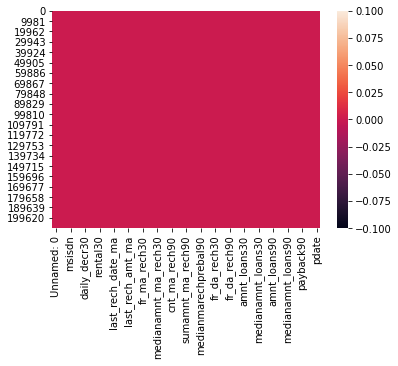

In [10]:
#visualizing the null values using heatmap
sns.heatmap(df.isnull())

It is clear from the heat map that there are no null values in any of the column.

In [11]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Unnamed: 0,209593
label,2
msisdn,186243
aon,4507
daily_decr30,147025
daily_decr90,158669
rental30,132148
rental90,141033
last_rech_date_ma,1186
last_rech_date_da,1174


Above are the number of unique values present in the columns of the dataset.

In [12]:
# Checking the uniqueness of target column
print("The unique value present in label is:",df['label'].unique())

The unique value present in label is: [0 1]


In [13]:
round(df['label'].value_counts(normalize=True)*100,2)

1    87.52
0    12.48
Name: label, dtype: float64

From the above we can see that it is an imbalanced Dataset.

There are only two unique values present in the label.No of defaulter's percentage is very low and it is only 12.48% in overall

In [14]:
# Checking value count of the label
print("The value count of the label is:\n",df["label"].value_counts())

The value count of the label is:
 1    183431
0     26162
Name: label, dtype: int64


This gives the list of values in the label. As we can see Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter which has 183431 values, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter which has 26162 values. So from this we can notice there is a class imbalance issue exists which need to be balanced in the later part.

# Data Pre-processing and Feature Engineering

In [15]:
# Checking value count of pcircle
print("Value count of pcircle:",df["pcircle"].value_counts())

Value count of pcircle: UPW    209593
Name: pcircle, dtype: int64


Number of unique value in pcircle: 1

Here pcircle column contains only one unique value so we can drop that column because it seems that the dataset have
contains only one circle area data. So it have not any impact in our model if we drop this feature.

## Note:
pdate variable needs to be changed to datetime format to extract the useful values.Then we can remove pdate column
"Unnamed: 0" contains only index values and "msisdn" contains mobile number of the user. \
Unnamed: 0 and msisdn are there only to locate the indivisual observation.
Unnamed: 0, pcircle, and msisdn are not necessary for our prediction.
Whereas  pcircle  has only one value in all the observation, there is no variance so we can remove all of this 


In [16]:
df.drop('Unnamed: 0',axis=1,inplace=True)

Since Index value is already available to represent the total number of data.

### Date Type conversion to Datetime format

The column "pdate" has object data type which is in the form of dd/mm/yy so we need to convert it into datetime type. And we will extract day, month and year from the column "pdate".

In [17]:
df['pdate']=pd.to_datetime(df['pdate'])
df['Year']=df['pdate'].dt.year
df['Month']=df['pdate'].dt.month
df['Day']=df['pdate'].dt.day

In [18]:
#Checking the number of months 
df['Month'].unique()

array([7, 8, 6], dtype=int64)

In [19]:
df[['Day','Month','Year']]

,Day,Month,Year
0,20,7,2016
1,10,8,2016
2,19,8,2016
3,6,6,2016
4,22,6,2016
...,...,...,...
209588,17,6,2016
209589,12,6,2016
209590,29,7,2016
209591,25,7,2016


In [20]:
# checkig the unique value present in column 'Year'
print("No of unique values present in Year column:",df['Year'].nunique())
# Checking value counts of Year column
print("\nValue count of Year column:",df["Year"].value_counts())

No of unique values present in Year column: 1

Value count of Year column: 2016    209593
Name: Year, dtype: int64


As we can see there is only one unique value that means all user data present in the dataset is collected in the same year 2016. We can also observe the value counts of the column Year.We can drop this column 'Year' since it won't affect our predictions.


In [21]:
df.drop('msisdn',axis=1,inplace=True)
df.drop('pdate',axis=1,inplace=True)
df.drop('pcircle',axis=1,inplace=True)
df.drop('Year',axis=1,inplace=True)

"pdate" is dropped,as the date column has been converted to integer and seperate date month and year columns created.We have successfully extracted day, month and year from pdate column and dropped pdate feature after extraction.
"pcircle" is also dropped, as it contain only one value which will not effect the data set much
"msisdn" is dropped as it only points to individual observations.
"Year" is dropped as the it contains same value in all the rows.

In [22]:
#lets check for duplicate values if there are any
df.duplicated().sum()

31

There are duplicate entries present in the dataset.

31 rows of data are duplicate

There are only 209562 unique records. Assumption: It is possible because same customer might taken loan multiple times in the same month or in different months of year.One time he might be paid in time, and other time he might not paid in time, etc.Each time he applied for loan will be evaluated and stored into different row.So let us keep the duplicate customers.

# Handling zero values¶

In [23]:
Zero_value = pd.DataFrame(df.isin([0]).sum().sort_values(ascending=False))
Zero_value.columns=['Count of Zero values']
Zero_value['% of Zero values']=Zero_value['Count of Zero values']/2095.93    # 209593/100 = 2095.93
Zero_value

,Count of Zero values,% of Zero values
fr_da_rech90,208728,99.587295
fr_da_rech30,208014,99.246635
cnt_da_rech30,205479,98.037148
cnt_da_rech90,204226,97.439323
last_rech_date_da,202861,96.788061
medianamnt_loans90,197424,94.193985
medianamnt_loans30,195445,93.249775
payback30,106712,50.913914
payback90,95699,45.659445
fr_ma_rech30,78683,37.540853


By looking into the above method of finding zero values we can observe the features

fr_da_rech90
fr_da_rech30
cnt_da_rech30
cnt_da_rech90
last_rech_date_da
medianamnt_loans90
medianamnt_loans30 

In all the above columns i found more than 90% zeros so they will create skewness in our dataset. 

These are the column values which are having zero values more than 90% ,they will create skewness in our dataset and are not required for the predictions so dropping these columns.

In [24]:
# Dropping columns having more than 90% of zero values
df.drop(columns=["fr_da_rech90","fr_da_rech30","cnt_da_rech30","cnt_da_rech90","last_rech_date_da","medianamnt_loans90","medianamnt_loans30"],axis=1,inplace=True)

In [25]:
# checkig the value count in column 'maxamnt_loans30' = maximum amount of loan taken by the user in last 30 days
df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
94122.633158         1
59668.008360         1
                 ...  
66749.081149         1
55723.858041         1
31545.936341         1
66847.875001         1
96775.751803         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

We know that the maximum amount taken by the user in last 30 days.

There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively. Also we can see zero entries which means the user haven't taken any kind of loan.
But from the value counts we can observe the data other than 6,12 and 0. So the data other than these values need to be converted into 0 assuming the user haven't taken any kind of loan, because there is no other amount to be return other than 6 & 12.

In [26]:
# Checking the values which have entries other than 6,12,0
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

We can observe out of 1050 rows there are 1047 rows having values other than 6,12 & 0. Let's convert them into 0 values.

In [27]:
# Converting the values having other than 6,12 & 0 into 0 values
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30'] = 0
.0

0.0

In [28]:
# Let's check the value count of the column maxamnt_loans30 after converting values into 0
df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

Now we have entries 6,12 and 0. We can observe there 4291 rows are having 0 values. That means user have not taken any kind of loan.

In [29]:
# Checking the value count in column 'maxamnt_loans90' = maximum amount of loans taken by the user in last 90 days
df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

The column maxamnt_loans90 has entries 0,6 and 12.
Here we can observe there are 2043 rows having 0 values where the maximum amount of loan taken by the user in last 90 days. That means user have not taken any king of loan.

In [30]:
# Checking the value count in column 'amnt_loans30' = Total amount of loans taken by the user in last 30 days
df['amnt_loans30'].value_counts().head(15)

6     76620
12    44384
18    26379
24    18403
30    11999
36     8559
42     5580
48     3994
0      3259
54     2660
60     2043
66     1402
72     1101
78      742
84      580
Name: amnt_loans30, dtype: int64

In [31]:
# Checking the value count in column 'amnt_loans90' = Total amount of loans taken by the user in last 90 days
df["amnt_loans90"].value_counts().head(15)

6     69131
12    38908
18    23867
24    17216
30    12503
36     9589
42     7388
48     5627
54     4429
60     3503
66     2799
72     2254
0      2043
78     1730
84     1438
Name: amnt_loans90, dtype: int64

From the value counts of amnt_loans30 and amnt_loans90 we can notice there are 3259 and 2043 rows have zero values. Let's remove the zero values in the column amnt_loans90 as it gives the sum of loans taken by the user in 90 days (It covers loan taken by the user in 30 days as well).

In [32]:
#droping the rows from amnt_loans90 data where loan values are 0.
#droping the people who haven't taken any loan
df.drop(df.loc[(df['amnt_loans90']== 0.0)].index,inplace=True)

Droping people who haven't taken any loans as we don't have any use from them.

In [33]:
# Checking value counts after removing the rows containing 0 values
df["amnt_loans90"].value_counts().head(15)

6     69131
12    38908
18    23867
24    17216
30    12503
36     9589
42     7388
48     5627
54     4429
60     3503
66     2799
72     2254
78     1730
84     1438
90     1184
Name: amnt_loans90, dtype: int64

In [34]:
# Checking shape of the dataset after dropping the rows
print('After Dropping rows new  shape is: ',df.shape)

After Dropping rows new  shape is:  (207550, 28)


In [35]:
# Checking data loss after removing rows having 0 values
data_loss = (209593-207550)/209593*100
data_loss

0.9747462940079105

After removing the rows having zero entries we are losing only 0.97% of data which is acceptable.

## Description of Dataset

In [36]:
# Statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,207550.0,0.873948,0.331908,0.000000,1.0000,1.000000,1.0000,1.000000
aon,207550.0,8095.156177,75605.569198,-48.000000,246.0000,527.000000,982.0000,999860.755168
daily_decr30,207550.0,5352.424286,9208.694592,-93.012667,41.7600,1414.400000,7200.0000,265926.000000
daily_decr90,207550.0,6044.967417,10902.815812,-93.012667,41.9795,1443.355000,7723.9975,320630.000000
rental30,207550.0,2674.303807,4272.953526,-23737.140000,278.1300,1074.880000,3330.5700,198926.110000
rental90,207550.0,3451.557712,5714.928132,-24720.580000,299.8300,1318.480000,4163.5700,200148.110000
last_rech_date_ma,207550.0,3744.288249,53813.277038,-29.000000,1.0000,3.000000,7.0000,998650.377733
last_rech_amt_ma,207550.0,2057.044751,2363.829442,0.000000,770.0000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,207550.0,3.991477,4.264318,0.000000,1.0000,3.000000,5.0000,203.000000
fr_ma_rech30,207550.0,3728.164201,53603.753070,0.000000,0.0000,2.000000,6.0000,999606.368132


The describe() method gives the statistical information of the dataset. The summary of this dataset is not perfect since there are some features have negative minimum values which are invalid values which we need to take care of by converting negative values into positive values.
The following features have negative values:

aon - age on cellular network in days
daily_decr30 - Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
daily_decr90 - Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
rental30 - Average main account balance over last 30 days
rental90 - Average main account balance over last 30 days
last_rech_date_ma - Number of days till last recharge of main account
medianmarechprebal30 - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
medianmarechprebal90 - Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

From the above discription we see that almost our data is imbalanced, we have more counts of 1 than 0 in or target variable. Almost every independent variable is highly skewed to right and has outliers.And some kind of skewness can also be seen. aon shows negative value at minimum as age (in terms of days) cannot be negative, daily_decr30 and daily_decr90 also shows genative value at minimum that too needs to be corrected. last_rech_date_ma and last_rech_date_da - minimum value also here should be corrected.

I will convert negative value columns  into absolute values to remove the negative value.



In [37]:
# Converting negative values present in the above features into positive values 
df["aon"] = abs(df["aon"])
df["daily_decr30"] = abs(df["daily_decr30"])
df["daily_decr90"] = abs(df["daily_decr90"])
df["rental30"] = abs(df["rental30"])
df["rental90"] = abs(df["rental90"])
df["last_rech_date_ma"] = abs(df["last_rech_date_ma"])
df["medianmarechprebal30"] = abs(df["medianmarechprebal30"])
df["medianmarechprebal90"] = abs(df["medianmarechprebal90"])

In [38]:
# Checking statistical summary of the dataset after converting negative to positive
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,207550.0,0.873948,0.331908,0.0,1.0000,1.000000,1.0000,1.000000
aon,207550.0,8095.625616,75605.518933,1.0,246.0000,527.000000,982.0000,999860.755168
daily_decr30,207550.0,5352.453575,9208.677568,0.0,41.7600,1414.400000,7200.0000,265926.000000
daily_decr90,207550.0,6044.996776,10902.799534,0.0,41.9835,1443.355000,7723.9975,320630.000000
rental30,207550.0,2697.321812,4258.460653,0.0,299.6900,1088.165000,3334.7500,198926.110000
rental90,207550.0,3477.845090,5698.968928,0.0,326.3400,1332.425000,4167.7625,200148.110000
last_rech_date_ma,207550.0,3744.568567,53813.257533,0.0,1.0000,3.000000,7.0000,998650.377733
last_rech_amt_ma,207550.0,2057.044751,2363.829442,0.0,770.0000,1539.000000,2309.0000,55000.000000
cnt_ma_rech30,207550.0,3.991477,4.264318,0.0,1.0000,3.000000,5.0000,203.000000
fr_ma_rech30,207550.0,3728.164201,53603.753070,0.0,0.0000,2.000000,6.0000,999606.368132


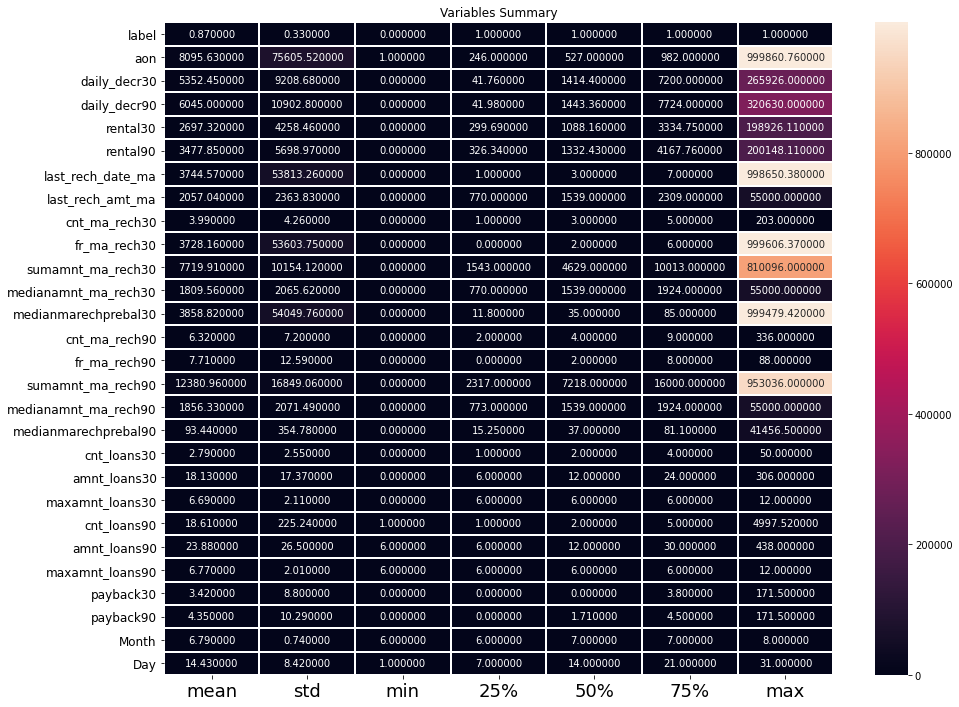

In [39]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

We have successfully converted negative values and the dataset looks perfect and have no invalid values.

From the above description we can observe the following things:

The counts of all the columns are same which means there are no missing values present in the dataset.
In all the features, the mean value is greater than the median(50%) which means all the columns are skewed to right except the target column label which has mean value bit less than median that means it is skewed to left.
By summarizing the data I can notice there is huge difference between maximum value and 75% percentile that leads to large number of outliers present in the dataset. We will remove these outliers using appropriate methods.
From the above summary we can notice the mean value of label is 0.873948.

It contains only three month data.



# Visualization

## Univariate Analysis

In [40]:
# Checking for total defaulters as it is imbalanced data.

In [41]:
Rows = df.shape[0]
Non_Defaulter = df[df["label"] == 1].shape[0]
Defaulter = df[df["label"] == 0].shape[0]
print("Total records = ",Rows)
print("Non_Defaulter = ",Non_Defaulter)
print("Defaulter     = ",Defaulter)

Total records =  207550
Non_Defaulter =  181388
Defaulter     =  26162


1    181388
0     26162
Name: label, dtype: int64


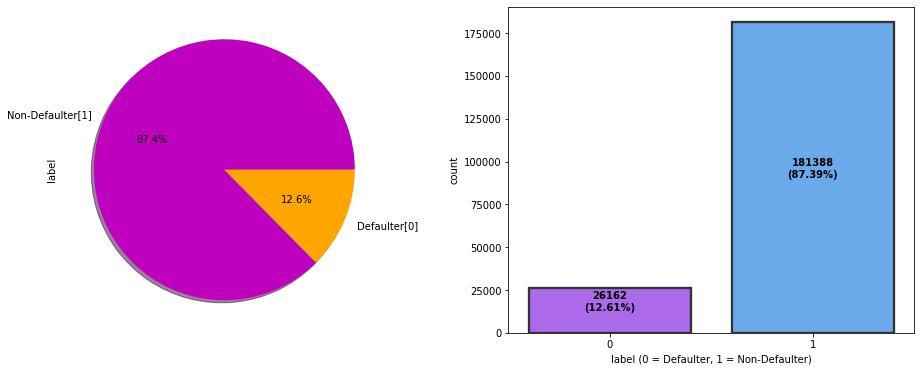

In [42]:
# Visualizing label whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
print(df['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(16,6))
labels = ['Non-Defaulter[1]', 'Defaulter[0]']
colors = ["m", "orange"]
df['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors)
ax = sns.countplot('label', data=df, ax=ax[1],palette="cool_r",linewidth=2.3, edgecolor=".2")
index = 0
for i in ax.patches:
    height = round(i.get_height(),2)
    total = len(df["aon"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.xlabel('label (0 = Defaulter, 1 = Non-Defaulter)')
plt.show()

Observations:

From the above plots we can observe around 87% of the loan has been paid by the user and only 12% of the loan failed to pay. Also the dataset is highly imbalanced, so we need to work on that or else our model will be more biased towards success and make false interpretation.

There is a data imbalancing issue so we have to treat this by using oversampling or undersampling. 

## Distribution of skewness

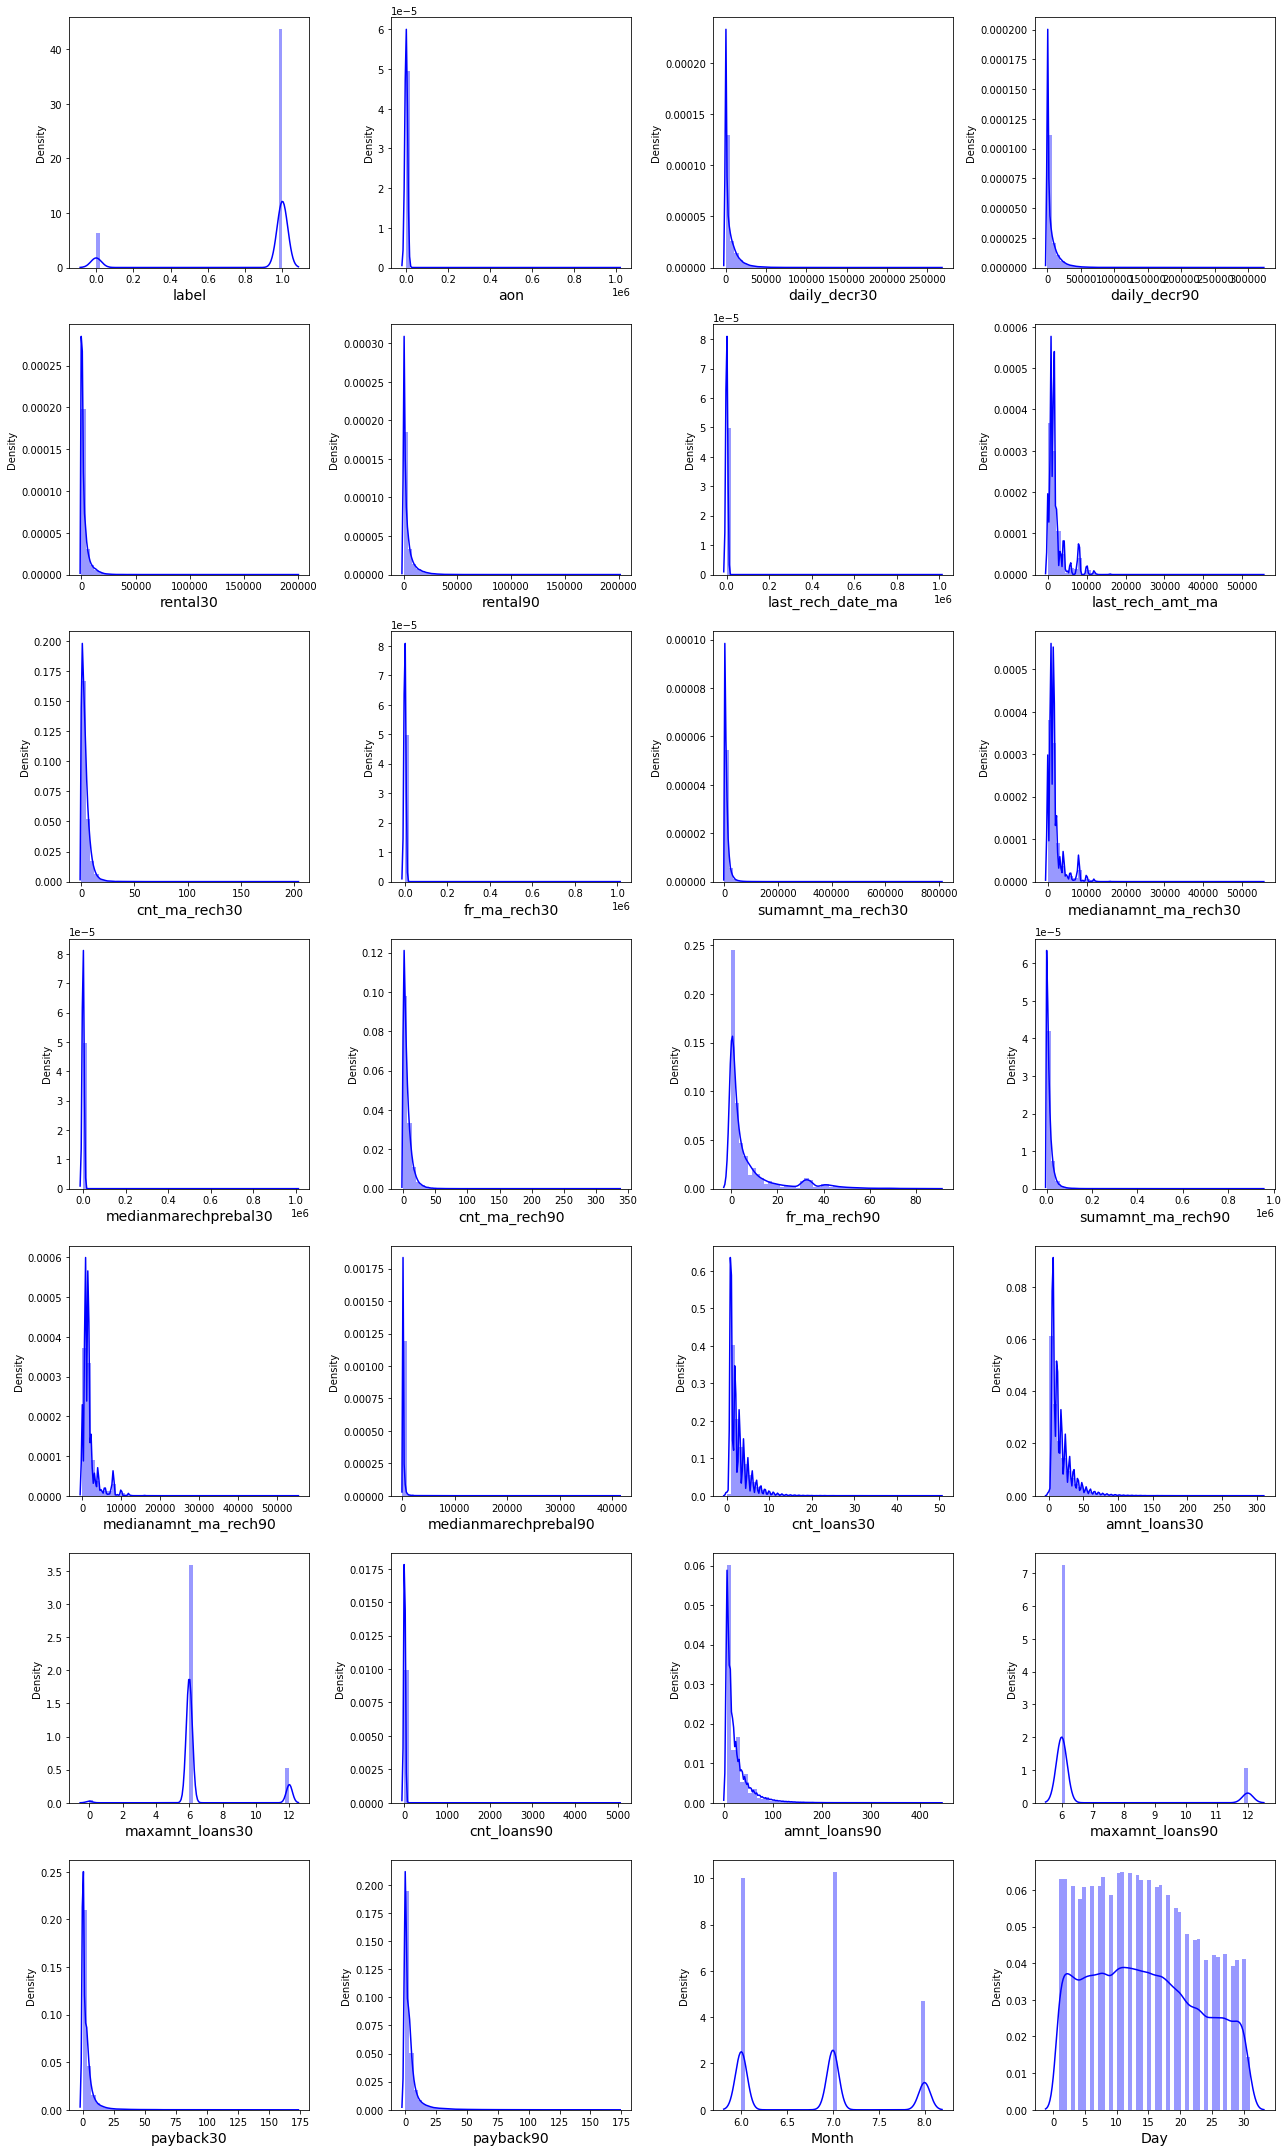

In [43]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(df[column],color="blue")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

Observations:

From the above distribution plot, I can observe most of the columns are not normally distributed only Day column somewhat distributed normally.
All the columns have skewness and are skewed to right since the mean is greater than the median in these columns. We need to remove this skewness before building our machine learning models.Data is highly spreaded and positively skewed which needs to be treated accordingly.


## Bivariate Analysis

### Compare independent features with Target(Label)

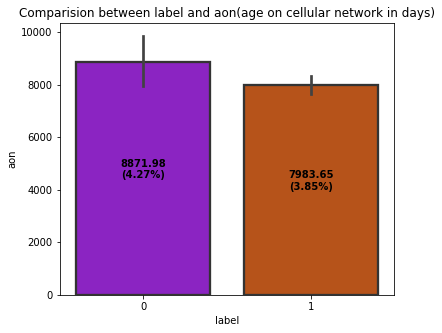

In [44]:
# Visualizing the age on cellular network in days and whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
plt.figure(figsize=(6,5))
ax = sns.barplot(df['label'],df['aon'], data=df,palette="gnuplot",linewidth=2.3, edgecolor=".2");
index=0

for i in ax.patches:
    height = round(i.get_height(),2)
    total = len(df["aon"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Comparision between label and aon(age on cellular network in days)')
plt.show()

Observations:

From the above bar plot we can observe that the defaulter rate is higher where the user age on cellular network in days is high which has around 8871 counts (in days).
Customers with high value of Age on cellular network in days(aon) are maximum defaulters(who have not paid there loan amount-0).

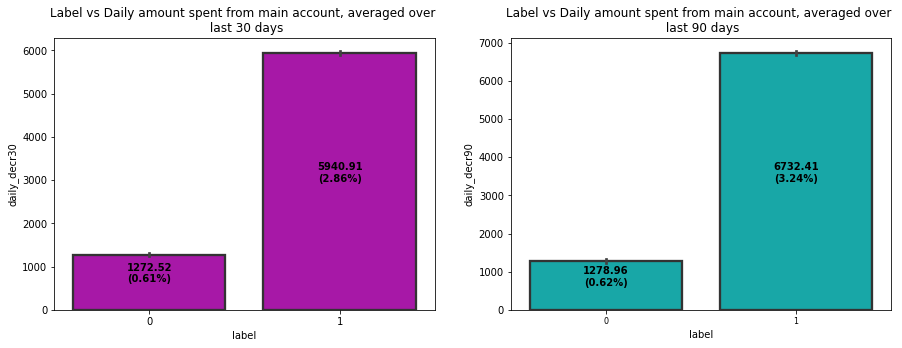

In [45]:
plt.figure(figsize=(15,5))

# Comparing label vs Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df['daily_decr30'],linewidth=2.3, edgecolor=".2",color="m")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["daily_decr30"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Daily amount spent from main account, averaged over \n last 30 days')

# Comparing label vs Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['daily_decr90'],linewidth=2.3, edgecolor=".2",color="c")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["daily_decr90"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Daily amount spent from main account, averaged over \n last 90 days')

plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)(daily_decr30) are maximum Non-defaulters(who have paid there loan amount-1).
Customers with high value of Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)(daily_decr90) are maximum Non-defaulters(who have paid there loan amount-1).

Hence,Most of the users who have paid back the credit amount within 5 days of issuing loan, they have high rate of daily amount spent from the account over last 30 days and 90 days which have the count around 5940 and 6732 respectively.
The users who have spent daily amount from main account over last 30 days and 90 days have always paid back the loan amount within 5 days. Around 0.6% of the users failed to pay back the loan within due date.

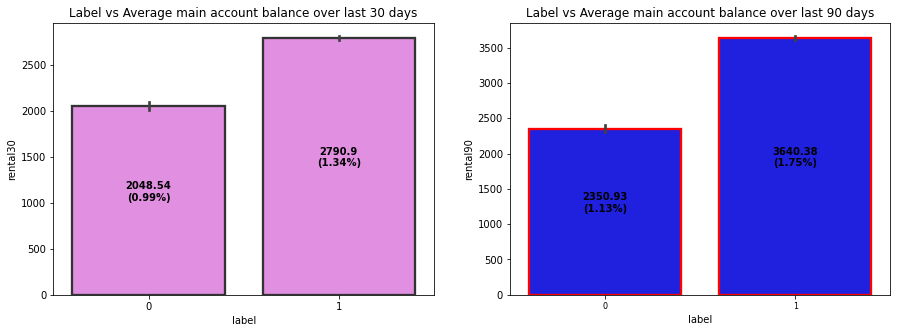

In [46]:
plt.figure(figsize=(15,5))

# Comparing label vs Average main account balance over last 30 days
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df['rental30'],linewidth=2.3, edgecolor=".2",color="violet")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["rental30"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Average main account balance over last 30 days')

# Comparing label vs Average main account balance over last 90 days
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['rental90'],linewidth=2.3, edgecolor="r",color="blue")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["rental90"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Average main account balance over last 90 days')

plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of Average main account balance over last 30 days(rental30) are maximum Non-defaulters(who have paid there loan amount-1).
Customers with high value of Average main account balance over last 90 days(rental90) are maximum Non-defaulters(who have paid there loan amount-1).

Hence,Non defaulter users have average main account balance over last 30 days and 90 days which have count around 2790 & 3640 compared to defaulter.
That means the users who have average main account balance always pays back the credit amounts within 5 days. And around 1% of the users either failed to payback the loan amount within the due date or they are not paying the loan.

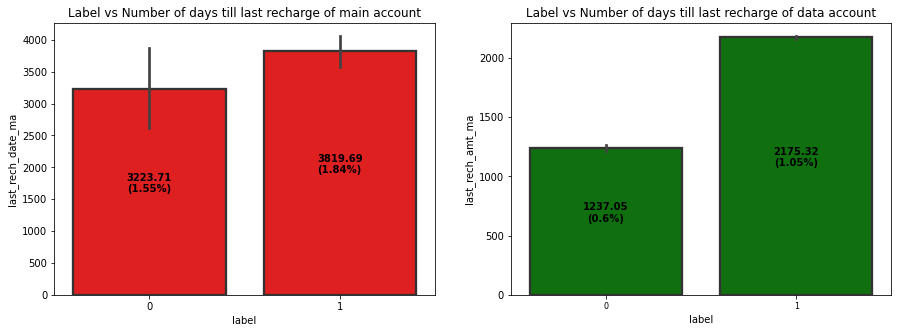

In [47]:
plt.figure(figsize=(15,5))

# Comparing label vs Number of days till last recharge of main account
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df['last_rech_date_ma'],linewidth=2.3, edgecolor=".2",color="r")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["last_rech_date_ma"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Number of days till last recharge of main account')

# Comparing label vs Number of days till last recharge of data account
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['last_rech_amt_ma'],linewidth=2.3, edgecolor=".2",color="g")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["last_rech_amt_ma"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Number of days till last recharge of data account')

plt.xticks(fontsize='8')
plt.show()

Observations:
Customers with high Number of days till last recharge of main account(last_rech_date_ma) are maximum Non-defaulters(who have paid there loan amount-1).
Customers with high value of Amount of last recharge of main account (in Indonesian Rupiah)(last_rech_amt_ma) are maximum Non-defaulters(who have paid there loan amount-1).

Hence,The users who have recharged their main account on time are most likely to pay back their loan amount within 5 days. Also some of the users who have not paid back their loan within 5 days they also recharged their main account on time.
Looking at above plot of last_rech_amt_ma, we can say that if the amount of last recharge of main account is around 2000 then a greater number of people will pay back the loan amount.

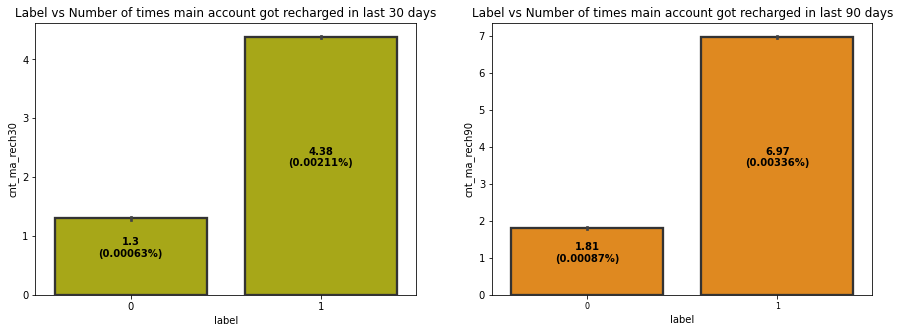

In [48]:
plt.figure(figsize=(15,5))

# Comparing label vs Number of times main account got recharged in last 30 days
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df["cnt_ma_rech30"],linewidth=2.3, edgecolor=".2",color="y")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["cnt_ma_rech30"])
    percentage = f"{height}\n({round(height*100/total,5)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Number of times main account got recharged in last 30 days')

# Comparing label vs Number of times main account got recharged in last 90 days
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['cnt_ma_rech90'],linewidth=2.3, edgecolor=".2",color="darkorange")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["cnt_ma_rech90"])
    percentage = f"{height}\n({round(height*100/total,5)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Number of times main account got recharged in last 90 days')

plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) and in last 90 days(cnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).

Hence,The non defaulters got recharged their main account more than 4 times in last 30 days and defaulters used to recharge their main account 1 time.
The users who have paid back their loan within 5 days have got recharged their main account upto 7 times in last 90 days and the users who have not been paid loan within due date, they have got recharged their main account twice in last 90 days.
From both the plots we can say that the users who got recharged their main account maximum times, they are able to pay back their loan amount within 5 days compared to the users who got their main account recharged less than 2 times.

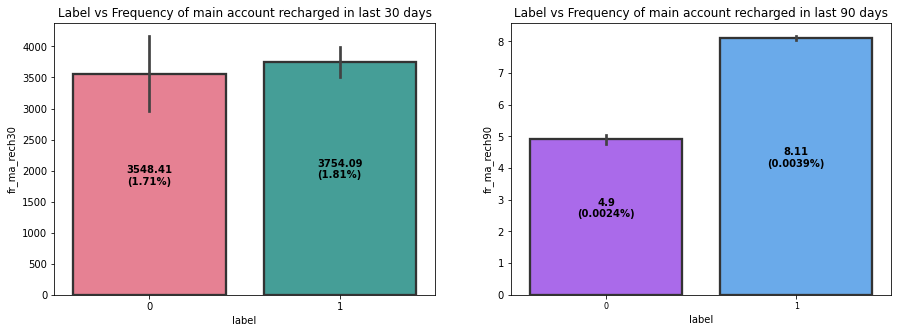

In [49]:
plt.figure(figsize=(15,5))

# Comparing label vs Frequency of main account recharged in last 30 days
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df["fr_ma_rech30"],linewidth=2.3, edgecolor=".2",palette="husl")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["fr_ma_rech30"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Frequency of main account recharged in last 30 days')

# Comparing label vs Frequency of main account recharged in last 90 days
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['fr_ma_rech90'],linewidth=2.3, edgecolor=".2",palette="cool_r")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["fr_ma_rech90"])
    percentage = f"{height}\n({round(height*100/total,4)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Frequency of main account recharged in last 90 days')

plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of Frequency of main account recharged in last 30 days(fr_ma_rech30) and in last 90 days(fr_ma_rech90)are maximum Non-defaulters(who have paid there loan amount-1) and also the count is high for defaulters comparitively Non-defaulters are more in number.

The count of defaulters and non-defaulters is almost similar for the frequency of main account recharged in last 30 days. They didn't pay back the loan within 5 days. Which means there it is not contributing more for prediction.
The frequency of main account recharged in last 90 days is increased for non-defaulters compared to defaulters.
From the frequency of main account recharged in last 30 days & 90 days we have seen the users with low frequency are causing huge losses, company should implement some kind of strategies to reduce that like send SMS alerts for notification.

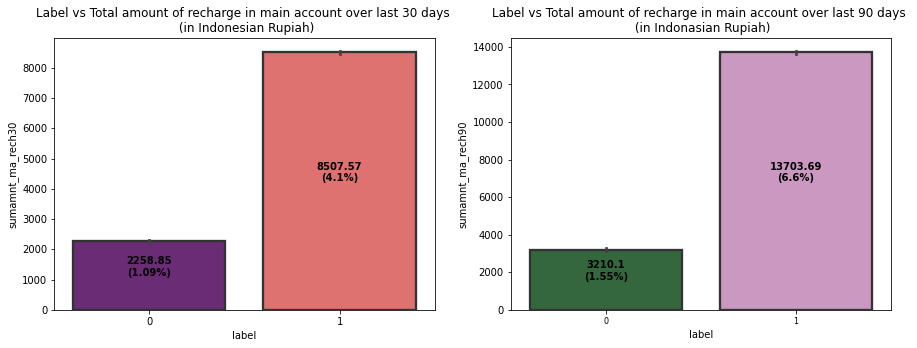

In [50]:
plt.figure(figsize=(15,5))

# Comparing label vs Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df["sumamnt_ma_rech30"],linewidth=2.3, edgecolor=".2",palette="magma")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["sumamnt_ma_rech30"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Total amount of recharge in main account over last 30 days \n (in Indonesian Rupiah)')

# Comparing label vs Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['sumamnt_ma_rech90'],linewidth=2.3, edgecolor=".2",palette="cubehelix")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["sumamnt_ma_rech90"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Total amount of recharge in main account over last 90 days \n (in Indonasian Rupiah)')

plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)(sumamnt_ma_rech30) and in last 90 days (in Indonesian Rupiah) (sumamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).

Hence,The users who failed to pay back the loan within 5 days have less amount of recharge in their main account over last 30 days which is around 2000-2400 (in Indonesian Rupiah). And the users who paid back their loan within 5 days, they are recharging their main account more than 8000 (in Indonesian Rupiah) in last 30 days.
The users who have paid their loan amount within 5 days have the total amount of recharge in their main account around 13700 (Indonesian Rupiah) in last 90 days while the defaulters have their total amount of recharge around 3200 (Indonesian Rupiah) over last 90 days.

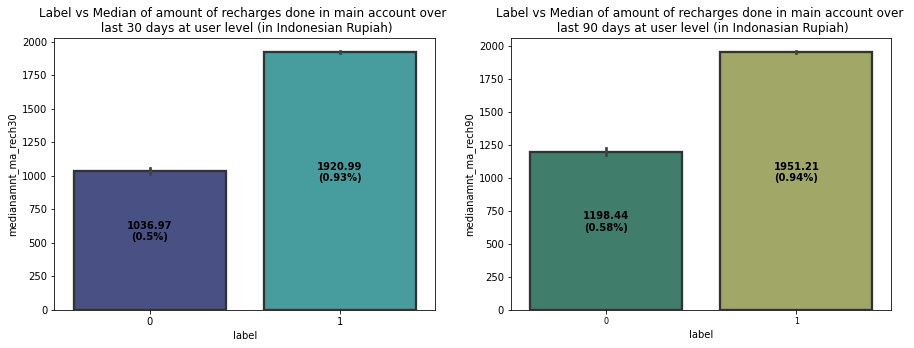

In [51]:
plt.figure(figsize=(15,5))

# Comparing label vs Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df["medianamnt_ma_rech30"],linewidth=2.3, edgecolor=".2",palette="mako")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["medianamnt_ma_rech30"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Median of amount of recharges done in main account over \n last 30 days at user level (in Indonesian Rupiah)')

# Comparing label vs Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['medianamnt_ma_rech90'],linewidth=2.3, edgecolor=".2",palette="gist_earth")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["medianamnt_ma_rech90"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Median of amount of recharges done in main account over \n last 90 days at user level (in Indonasian Rupiah)')

plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) and in last 90 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).

Hence,The users who have done their median amount of recharge of 1920 (Indonesian Rupiah) in main account over last 30 days have successfully paid their credit amount within 5 days of issuing loan while the users who have done amount recharge of 1036 have failed to pay back the loan within due date.
Similar to 30 days data, here also the users who have done their median amount recharge of 1950 in their main account over last 90 days they have paid back their credit amount within 5 days while the users having their median amount 1198 have not paid the loan within 5 days.

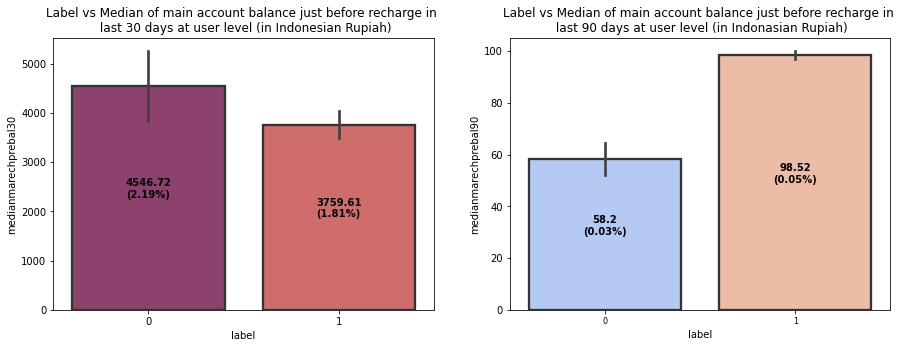

In [52]:
plt.figure(figsize=(15,5))

# Comparing label vs Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df["medianmarechprebal30"],linewidth=2.3, edgecolor=".2",palette="flare_r")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["medianmarechprebal30"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Median of main account balance just before recharge in \n last 30 days at user level (in Indonesian Rupiah)')

# Comparing label vs Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['medianmarechprebal90'],linewidth=2.3, edgecolor=".2",palette="coolwarm")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["medianmarechprebal90"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Median of main account balance just before recharge in \n last 90 days at user level (in Indonasian Rupiah)')
plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)(medianmarechprebal30) and  in last 90 days at user level (in Indonesian Rupiah)(medianmarechprebal90) are maximum defaulters(who have not paid there loan amount-0).

In 30 days data, the median of main account balance for defaulters are around 4500 (Indonesian Rupiah) which is high compared to non-defaulters. Which means increasing median of main account balance just before recharge in last 30 days at user level, increasing the probability to being defaulter.
In last 90 days data, the median of main account balance for non-defaulters are around 100 (Indonesian Rupiah) which is high compared to defaulters. Which means increasing median of main account balance just before recharge in last 90 days at user level, increasing the probability of being non-defaulters.

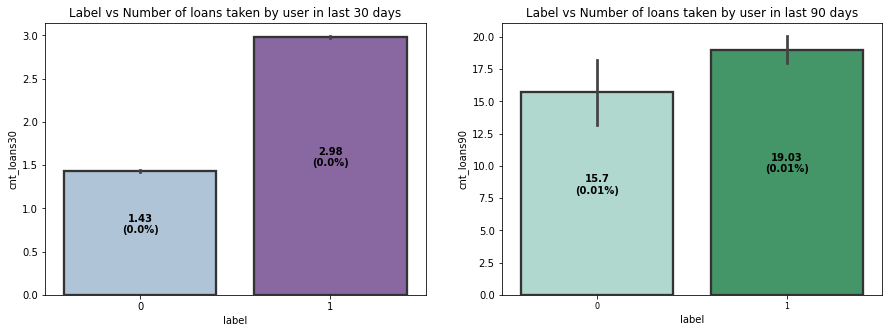

In [53]:
plt.figure(figsize=(15,5))

# Comparing label vs Number of loans taken by user in last 30 days
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df["cnt_loans30"],linewidth=2.3, edgecolor=".2",palette="BuPu")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["cnt_loans30"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Number of loans taken by user in last 30 days')

# Comparing label vs Number of loans taken by user in last 90 days
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['cnt_loans90'],linewidth=2.3, edgecolor=".2",palette="BuGn")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["cnt_loans90"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Number of loans taken by user in last 90 days')
plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of Number of loans taken by user in last 30 days(cnt_loans30) and  in last 90 days(cnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).

And Defaulters have taken 1 loan in last 30 days that is when a person takes loan amount for 1 time in last 30 days the chances of not paying back the credit amount are higher. And the users who have paid back the loan, they have taken maximum number of 3 loans in last 30 days data.
In 90 days data, the number of loans taken by the defaulters are highly increasing also increasing the probability to being defaulter. Also, the number of loans taken by non-defaulters being decreased in last 90 days when compared to 30 days data.

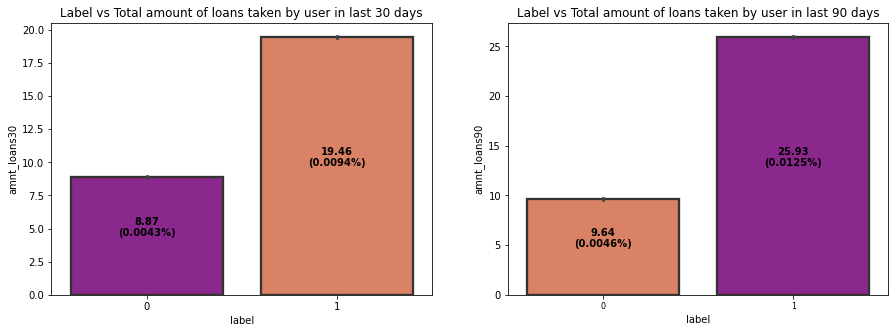

In [54]:
plt.figure(figsize=(15,5))

# Comparing label vs Total amount of loans taken by user in last 30 days
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df["amnt_loans30"],linewidth=2.3, edgecolor=".2",palette="plasma")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["amnt_loans30"])
    percentage = f"{height}\n({round(height*100/total,4)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Total amount of loans taken by user in last 30 days')

# Comparing label vs Total amount of loans taken by user in last 90 days
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['amnt_loans90'],linewidth=2.3, edgecolor=".2",palette="plasma_r")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["amnt_loans90"])
    percentage = f"{height}\n({round(height*100/total,4)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Total amount of loans taken by user in last 90 days')
plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of Total amount of loans taken by user in last 30 days(amnt_loans30) and in last 90 days(amnt_loans90)are maximum Non-defaulters(who have paid there loan amount-1).

The total amount of loans taken by the defaulters in last 30 days are in the range of 7.5-10 while the non-defaulters have taken upto 20 loans in last 30 days.
The total amount of loans taken by the defaulters in last 90 days are upto 10 and the non- defaulters have taken total amount of loans upto 26 in last 90 days.
So, from the above plot we can conclude that when the total number of loans taken by the users in last 90 days is below 10, then the chances of not paying back the loan amount are high.

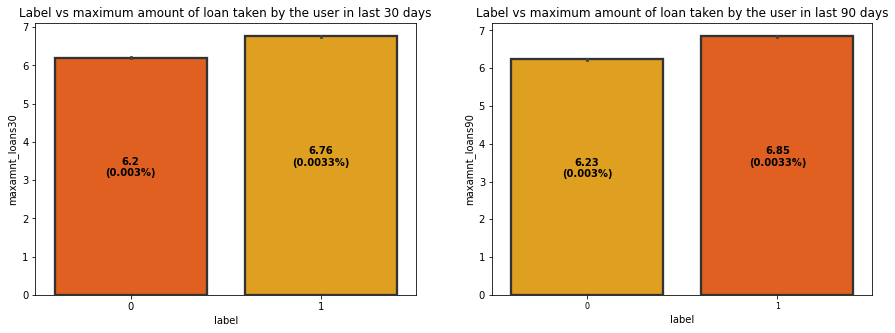

In [55]:
plt.figure(figsize=(15,5))

# Comparing label vs maximum amount of loan taken by the user in last 30 days
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df["maxamnt_loans30"],linewidth=2.3, edgecolor=".2",palette="autumn")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["maxamnt_loans30"])
    percentage = f"{height}\n({round(height*100/total,4)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs maximum amount of loan taken by the user in last 30 days')

# Comparing label vs maximum amount of loan taken by the user in last 90 days
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['maxamnt_loans90'],linewidth=2.3, edgecolor=".2",palette="autumn_r")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["maxamnt_loans90"])
    percentage = f"{height}\n({round(height*100/total,4)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs maximum amount of loan taken by the user in last 90 days')
plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) and in last 90 days(maxamnt_loans90)are maximum Non-defaulters(who have paid there loan amount-1).

The maximum amount of loan taken by the user in last 30 days and 90 days are almost same. The maximum amount of loan taken by the defaulters and non-defaulters are upto 6 and 7 respectively in last 30 and 90 days.
So from the plot we can say that whenever the user takes the maximum loan amount of 6, then only some users may not pay back the loan amount.

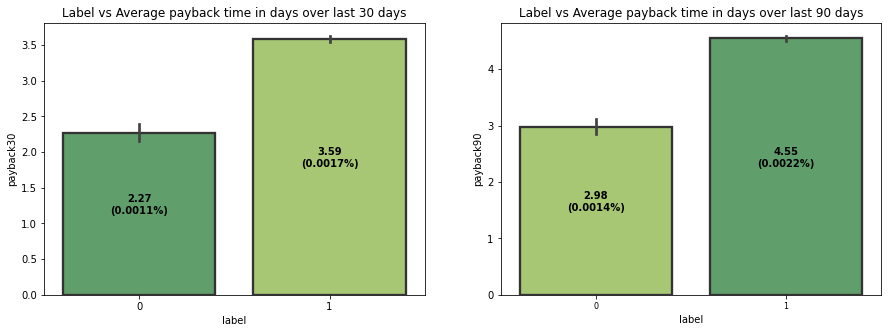

In [56]:
plt.figure(figsize=(15,5))

# Comparing label vs Average payback time in days over last 30 days
plt.subplot(1,2,1)
index=0
a=sns.barplot(x=df['label'],y=df["payback30"],linewidth=2.3, edgecolor=".2",palette="summer")

for i in a.patches:
    height = round(i.get_height(),2)
    total = len(df["payback30"])
    percentage = f"{height}\n({round(height*100/total,4)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Average payback time in days over last 30 days')

# Comparing label vs Average payback time in days over last 90 days
plt.subplot(1,2,2)
b=sns.barplot(x=df['label'],y=df['payback90'],linewidth=2.3, edgecolor=".2",palette="summer_r")
index=0

for j in b.patches:
    height = round(j.get_height(),2)
    total = len(df["payback90"])
    percentage = f"{height}\n({round(height*100/total,4)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.title('Label vs Average payback time in days over last 90 days')
plt.xticks(fontsize='8')
plt.show()

Observations:

Customers with high value of Average payback time in days over last 30 days(payback30) and in last 90 days(payback90) are maximum Non-defaulters(who have paid there loan amount-1).

The defaulters are paying back their loan in an average of 2-2.5 days and the non-defaulters are paying back their loan in an average of 3 days over last 30 days.
The defaulters in last 90 days, are paying back their loan in an average of 3 days and non-defaulters are paying back their loan in 4-5 days over last 90 days.
It is seen from the plot that when an average payback time is below 3 days over last 30 & 90 days, then defaulters' rate is high.

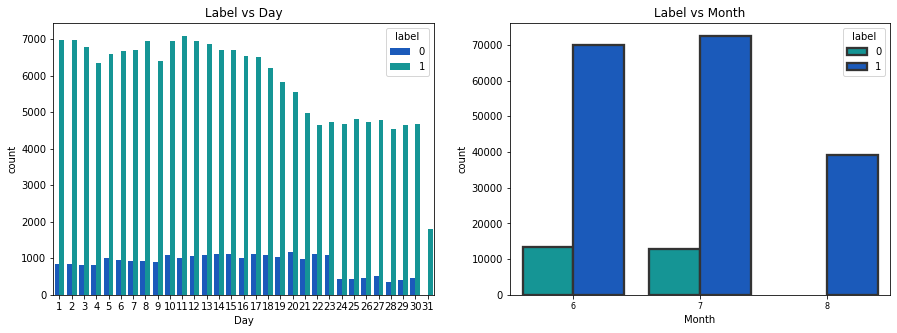

In [57]:
plt.figure(figsize=(15,5))

# Comparing label vs Day
plt.subplot(1,2,1)
sns.countplot(x=df['Day'],hue=df["label"],linewidth=2.3,palette="winter")
plt.title('Label vs Day')

# Comparing label vs Average payback time in days over last 90 days
plt.subplot(1,2,2)
sns.countplot(x=df['Month'],hue=df['label'],linewidth=2.3, edgecolor=".2",palette="winter_r")
plt.title('Label vs Month')
plt.xticks(fontsize='8')
plt.show()

Observations:

In between 6th and 7th month maximum customers both defualters and Non-defaulters have paid there loan amount.
The users who have taken loans in the month of august, they seem paying back their loan within 5 days.

Below 14th of each month all the customers have paid there loan amount.

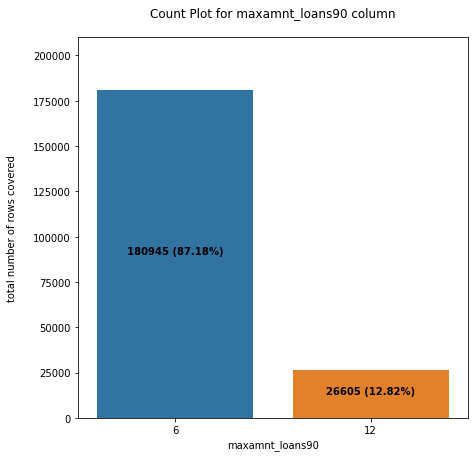

In [58]:
try:
    x = 'maxamnt_loans90'
    k=0
    plt.figure(figsize=[7,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation:
   This shows that,In 90 days maximum amount of loan are taken for 5 rupees and payed back as 6 rupees.

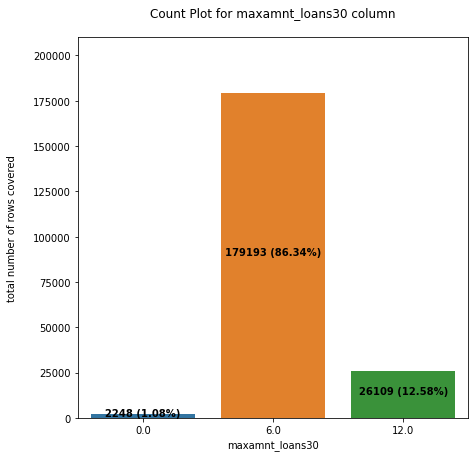

In [59]:
try:
    x = 'maxamnt_loans30'
    k=0
    plt.figure(figsize=[7,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation: This shows that,In 30 days maximum amount of loan are taken for 5 rupees and payed back as 6 rupees.

# Checking Correlation Using HeatMap

In [60]:
#find correlation co.efficient of all variables in table
cor=df.corr()
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
label,1.000000,-0.003900,0.168263,0.166017,0.057860,0.075098,0.003676,0.131744,0.239399,0.001274,...,0.201600,0.202318,0.087468,0.004902,0.204055,0.101247,0.049668,0.050577,0.151680,0.008241
aon,-0.003900,1.000000,0.000987,0.000319,-0.000561,-0.000504,0.001818,0.003749,-0.002831,-0.001077,...,-0.001604,-0.001513,-0.000008,-0.000558,-0.002142,-0.000499,0.002174,0.002456,-0.002268,0.000998
daily_decr30,0.168263,0.000987,1.000000,0.977689,0.445827,0.464531,0.000014,0.273527,0.452708,-0.000623,...,0.373957,0.480214,0.401807,0.009180,0.572071,0.435069,0.028252,0.048500,0.522744,0.008077
daily_decr90,0.166017,0.000319,0.977689,1.000000,0.438313,0.477283,0.000460,0.261557,0.428065,-0.000437,...,0.348302,0.456706,0.396058,0.009700,0.576183,0.433017,0.020861,0.042248,0.543263,-0.019652
rental30,0.057860,-0.000561,0.445827,0.438313,1.000000,0.955513,-0.001257,0.132898,0.239774,-0.001283,...,0.189217,0.242995,0.239718,0.004435,0.307896,0.264363,0.075283,0.097797,0.365532,0.040602
rental90,0.075098,-0.000504,0.464531,0.477283,0.955513,1.000000,-0.001940,0.126216,0.237016,-0.000606,...,0.181793,0.242898,0.256000,0.005622,0.338620,0.287473,0.069854,0.102944,0.430502,0.012918
last_rech_date_ma,0.003676,0.001818,0.000014,0.000460,-0.001257,-0.001940,1.000000,-0.000092,0.003980,-0.002067,...,0.001439,0.001135,-0.000746,-0.000181,0.001070,-0.000468,-0.002093,-0.001420,-0.001595,0.000718
last_rech_amt_ma,0.131744,0.003749,0.273527,0.261557,0.132898,0.126216,-0.000092,1.000000,-0.000700,0.003252,...,-0.024569,0.011884,0.151791,0.000159,0.017058,0.168291,-0.026841,-0.013628,0.094308,0.030666
cnt_ma_rech30,0.239399,-0.002831,0.452708,0.428065,0.239774,0.237016,0.003980,-0.000700,1.000000,0.001394,...,0.769089,0.755241,0.168277,0.014733,0.687172,0.173439,0.043146,0.016416,0.162367,0.068376
fr_ma_rech30,0.001274,-0.001077,-0.000623,-0.000437,-0.001283,-0.000606,-0.002067,0.003252,0.001394,1.000000,...,0.002884,0.002676,-0.000888,0.002848,0.002814,-0.001425,0.001628,0.001177,-0.002054,0.001208


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

From the above we can cinclude that much of the variables have somewhat relations with each other. We will use Feature selection to select the best features.

<AxesSubplot:>

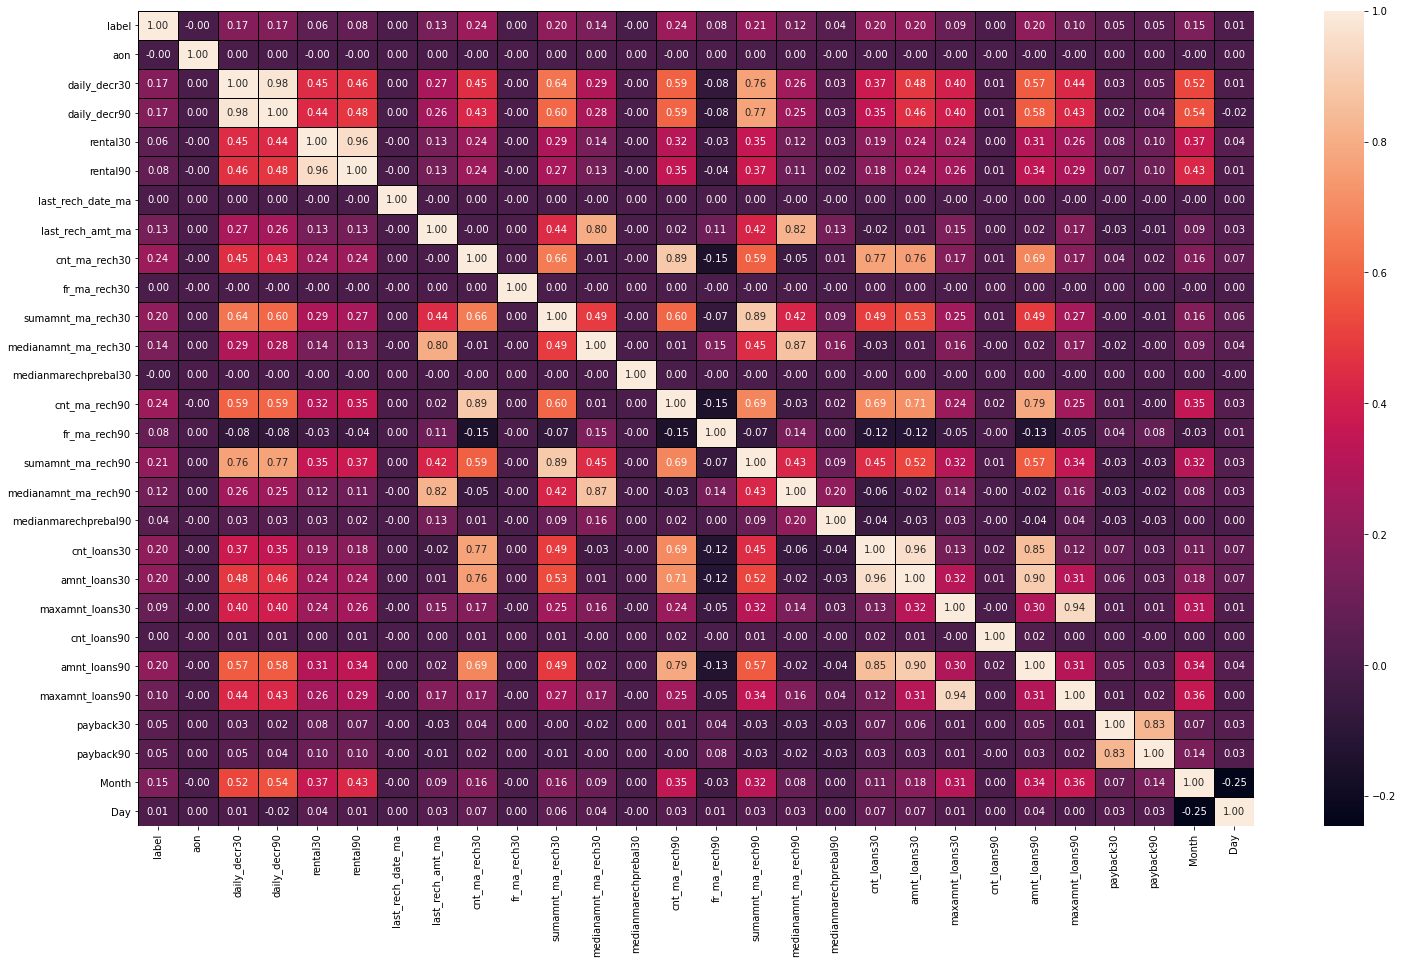

In [61]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

This heatmap shows the correlation matrix of the data. We can observe the relation between one feature to other and relation between features and label. Here we can notice there is no strong relation between features and label.
Dark shades are highly positively correlated with the label and light shades are highly negatively correlated with the label.


The features 


sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonasian Rupiah)
sumamnt_ma_rech90:Total amount of recharge in main account over last 90 days (in Indonasian Rupiah-)
daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
cnt_ma_rech30: Number of times main account got recharged in last 30 days
cnt_ma_rech90: Number of times main account got recharged in last 90 days


cnt_loans30 & cnt_loans90: Number of loans taken by user in last 30 days & 90 days respectively.
amnt_loans30 & amnt_loans90: Total amount of loans taken by user in last 30 days and 90 days



These features have somewhat strong correlation with the label of defaulters and non-defaulters data. Also, we can observe there are no negative correlation between label and features. Most of the features are correlated with each other.


1-daily_decr30 and daily_decr90 features are highly correlated with each other.

2-rental30 and rental90 features are highly correlated with each other.

3-cnt_loans30 and amount_loans30 columns are highly correlated with each other.

4-amount_loans30 is also highly correlated with amount_loans90 column.

5-medianamnt_loans30 and medianamnt_loans90 is highly correlated with each other.

6-We have to drop one of the features which are highly correlated with other feayures. And if we dont do this then our
  model will face multicolinearity problem.

In [62]:
cor['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.239399
cnt_ma_rech90           0.237831
sumamnt_ma_rech90       0.206712
sumamnt_ma_rech30       0.204252
amnt_loans90            0.204055
amnt_loans30            0.202318
cnt_loans30             0.201600
daily_decr30            0.168263
daily_decr90            0.166017
Month                   0.151680
medianamnt_ma_rech30    0.142047
last_rech_amt_ma        0.131744
medianamnt_ma_rech90    0.120616
maxamnt_loans90         0.101247
maxamnt_loans30         0.087468
fr_ma_rech90            0.084565
rental90                0.075098
rental30                0.057860
payback90               0.050577
payback30               0.049668
medianmarechprebal90    0.037722
Day                     0.008241
cnt_loans90             0.004902
last_rech_date_ma       0.003676
fr_ma_rech30            0.001274
aon                    -0.003900
medianmarechprebal30   -0.004833
Name: label, dtype: float64

These are the most positively correlated column with the target column 'label'

cnt_ma_rech30           
cnt_ma_rech90           
sumamnt_ma_rech90       
sumamnt_ma_rech30      
amnt_loans90            
amnt_loans30            
cnt_loans30           


# Visualizing the correlation between label and features 

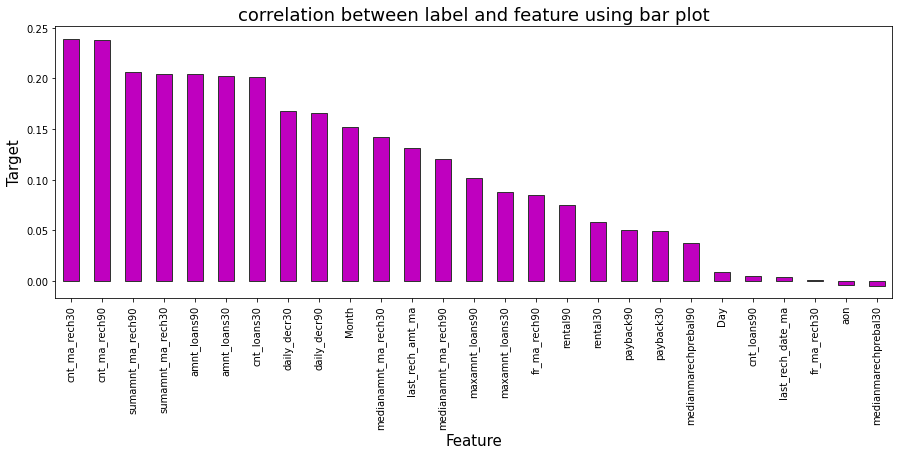

In [63]:
plt.figure(figsize=(15,5))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='m',edgecolor=".2")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive correlation between the label and features.

cnt_ma_rech30
cnt_ma_rech90
sumamnt_ma_rech90
sumamnt_ma_rech30
amnt_loans90
amnt_loans30
cnt_loans30

Are mostly positively correlated features with Target.



Here the column fr_ma_rech30 is less correlated with the label compared to others, we can drop these columns if necessary.
We don't find any columns with negative correlation.

# Feature Importance

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
# Lets chkeck the feature importance using Random Forest Regressor

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFC.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
daily_decr90,0.140
daily_decr30,0.135
Day,0.079
rental90,0.065
rental30,0.061
aon,0.060
sumamnt_ma_rech90,0.053
Month,0.046
medianmarechprebal90,0.044


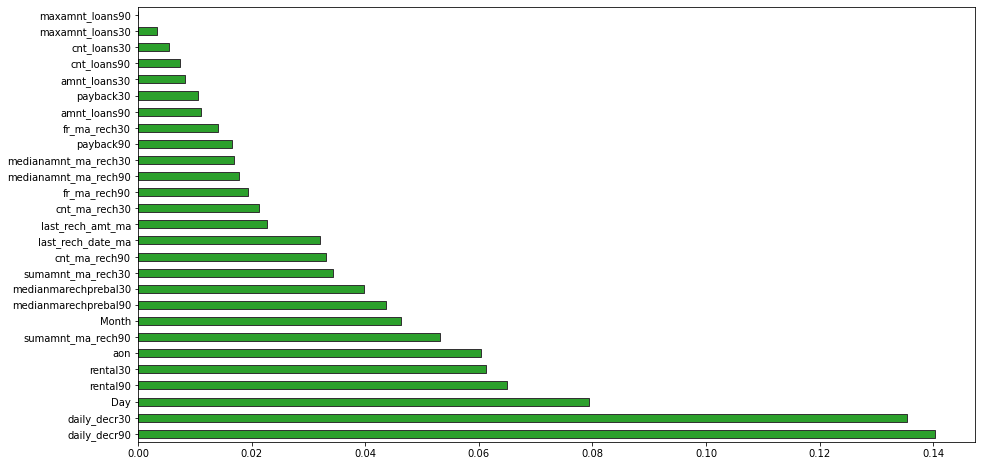

In [170]:
plt.figure(figsize=(15,8))
importances=pd.Series(RFC.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="tab:green",edgecolor=".2")
plt.show()

Here with the help of RandomForestClassifier we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label. Here we can clearly observe the features which are important for the predictions. The columns daily_decr90 column contributing more for the predictions.

### Checking data types for encoding

In [64]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,2,12,6.0,2.0,12,6,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,3,18,6.0,3.0,18,6,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,4,42,12.0,6.0,54,12,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,...,2,18,12.0,3.0,24,12,0.000000,10.500000,7,25


In features, the values which are not realistic like negative values,high range values,zero values and unwanted columns etc., we treated that and the data is ready for model now

In [65]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
payback30               float64
payback90               float64
Month                     int64
Day                       int64
dtype: object

Since there are no objec data types present.Hence no need to make Label Encoding

## Identifying the outliers

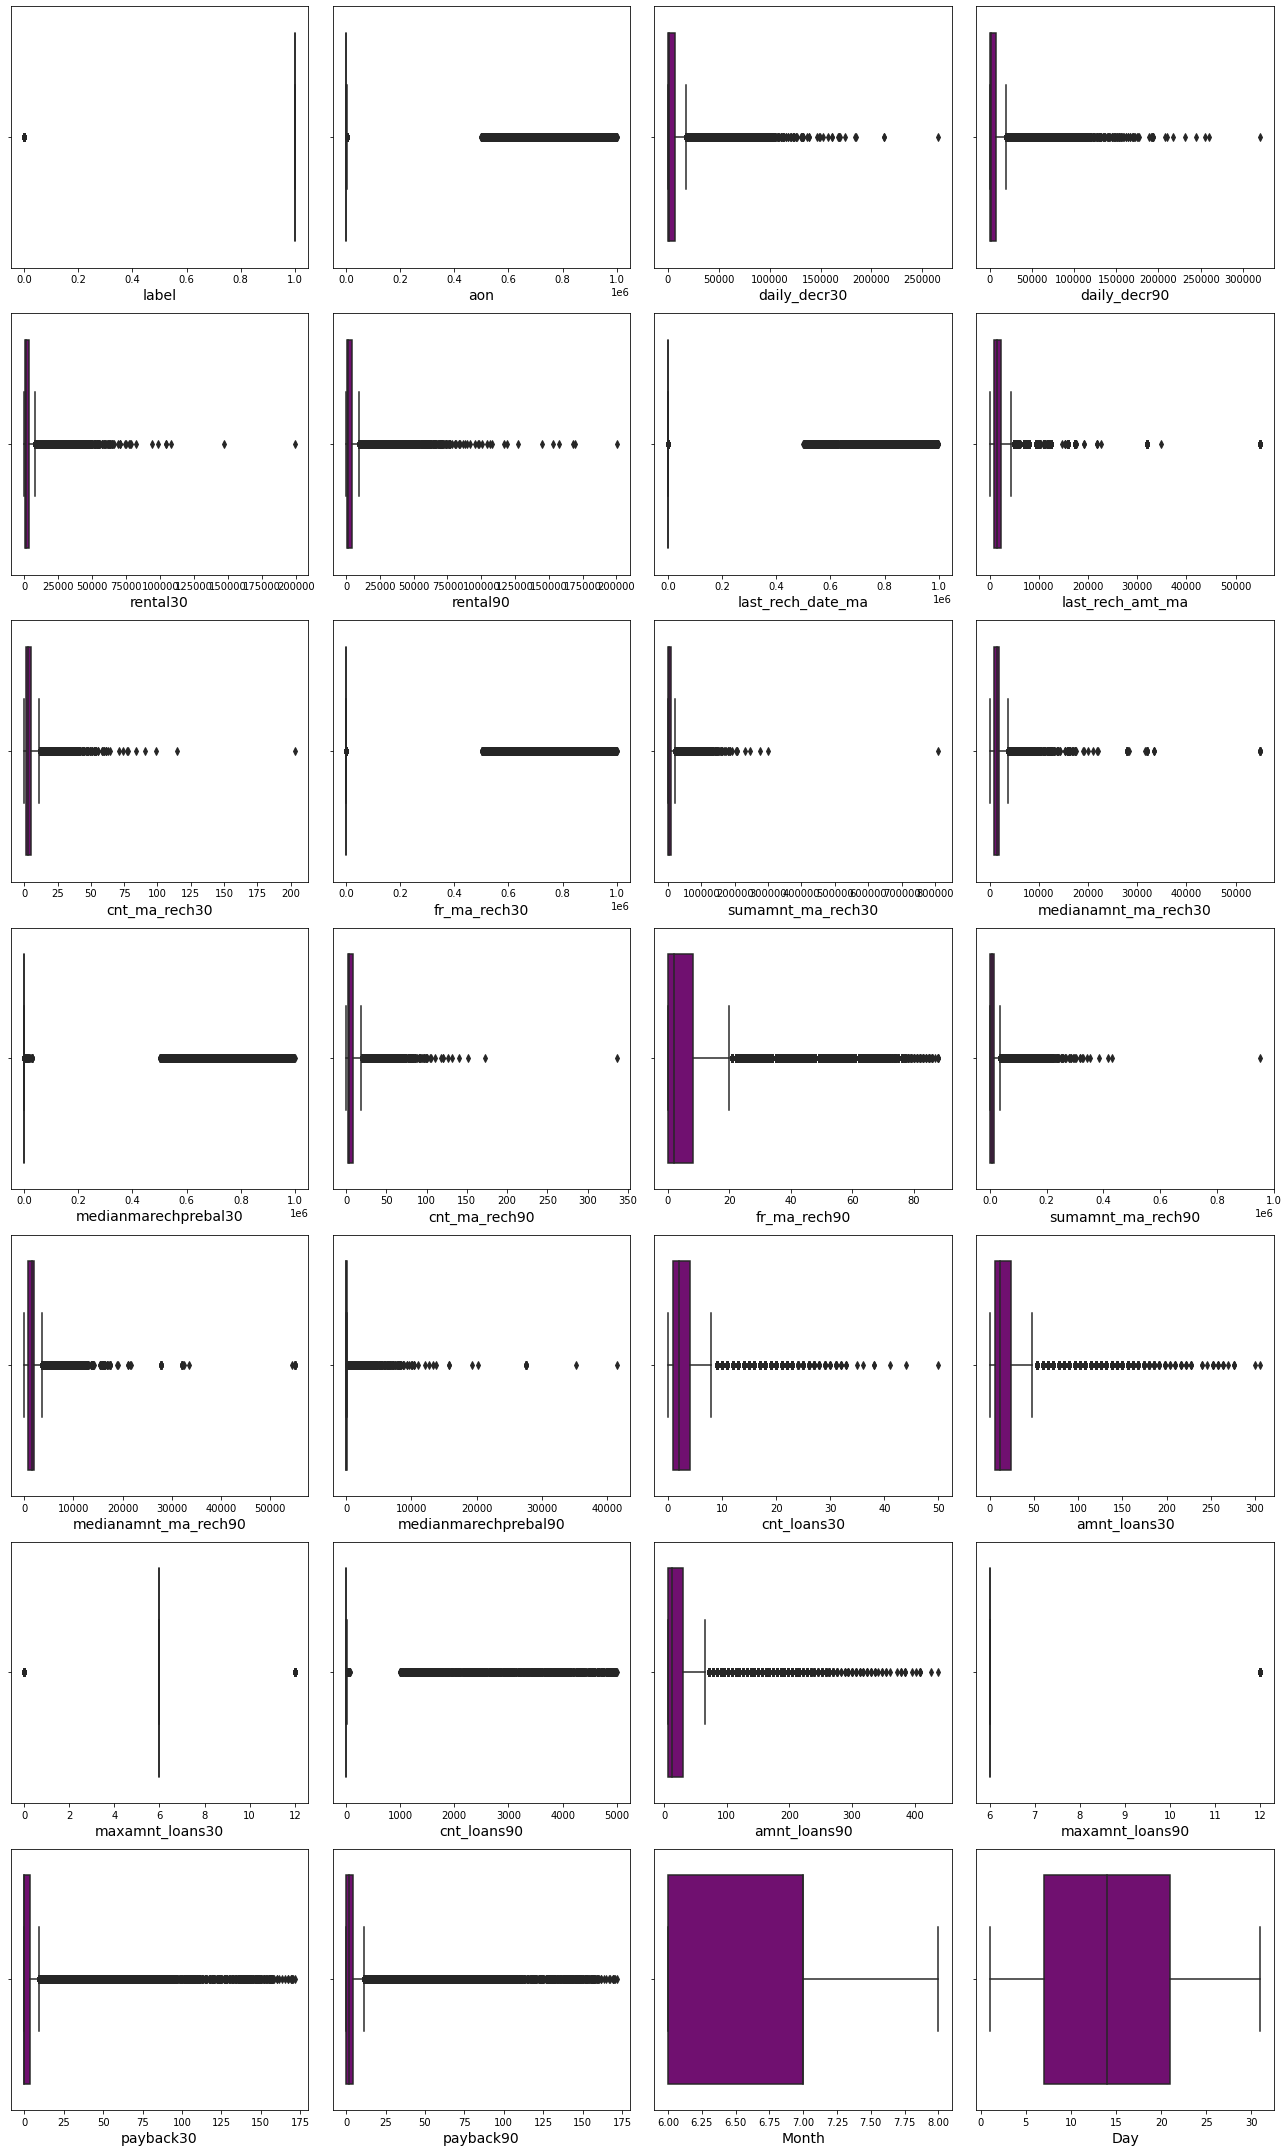

In [66]:
# Identifying the outliers using boxplot
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color="purple")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

From the above box plot we can notice the outliers present in all the features except Day and Month columns. Let's remove the outliers in these columns except Day, Month and label. Since label is our target columns we should not loose any data by removing outliers in this column.

# Removing outliers

## Zscore method

In [67]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,2,12,6.0,2.0,12,6,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,3,18,6.0,3.0,18,6,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,4,42,12.0,6.0,54,12,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,...,2,18,12.0,3.0,24,12,0.000000,10.500000,7,25


In [68]:
# Feature containing outliers
features= df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]

In [69]:
# Using zscore to remove outliers
from scipy.stats import zscore

In [70]:
z=np.abs(zscore(features))
# Creating new dataframe by setting z to 3
new_df = df[(z<3).all(axis=1)] 
new_df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,2,12,6.0,2.0,12,6,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,3,18,6.0,3.0,18,6,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,4,42,12.0,6.0,54,12,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,...,2,18,12.0,3.0,24,12,0.000000,10.500000,7,25


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3.

In [71]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (207550, 28)
Shape of dataset after removing outliers: (170071, 28)


In [72]:
# Checking the the data loss after removing outliers
data_loss = (207550-170071)/207550*100
data_loss

18.05781739339918

By using Zscore I am losing around 18% of data which is not acceptable. The acceptable range of data loss is 7-8%. So let's try to remove outliers using IQR method.

# IQR (Inter Quartile Range) method

In [73]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape of data after using IQR method:", df1.shape)

Shape of data after using IQR method: (78654, 28)


In [74]:
# Checking the the data loss after removing outliers
data_loss = (207550-78654)/207550*100
data_loss

62.103589496506864

By using Zscore and IQR method I am losing large amount of data, let's use percentile method to remove the outliers by setting the dataloss to 2%.

# Percentile Method

In [75]:
# Checking the shape of data we have before treating of outliers.
print('before removing outliers shape was:', df.shape)

before removing outliers shape was: (207550, 28)


In [76]:
#Removing outliers using percentile method in train dataset
for col in features:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]
        

I have successfully removed the outliers present in dataset using percentile method.

In [77]:
# Checking the shape of data we have after treating of outliers.
print('after removing outliers shape is: ', df.shape)


after removing outliers shape is:  (207550, 28)


No data loss happened

## Skewness Removal

In [78]:
# Checking for skewness in dataset
df.skew()

label                  -2.253346
aon                     0.934791
daily_decr30            1.978547
daily_decr90            2.098290
rental30                2.117210
rental90                2.205817
last_rech_date_ma       2.565623
last_rech_amt_ma        2.016661
cnt_ma_rech30           1.410702
fr_ma_rech30            1.703431
sumamnt_ma_rech30       1.749207
medianamnt_ma_rech30    2.122065
medianmarechprebal30    2.799234
cnt_ma_rech90           1.566573
fr_ma_rech90            1.987801
sumamnt_ma_rech90       1.863681
medianamnt_ma_rech90    2.143777
medianmarechprebal90    2.631175
cnt_loans30             1.597669
amnt_loans30            1.752260
maxamnt_loans30         1.634976
cnt_loans90             2.000454
amnt_loans90            1.910837
maxamnt_loans90         2.224471
payback30               2.635055
payback90               2.826565
Month                   0.358219
Day                     0.184762
dtype: float64

Here we can observe the skewness present in all the columns except Day and Month. Since label is our target variable no need to remove skewness in this column as well. Lets remove the columns having skewness more than +0.5 & -0.5 using power transformation method(yeo-johnson method).

# Removing skewness using yeo-johnson method

In [79]:
# Removing skewness using yeo-johnson  method to get better prediction
features= ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

In [80]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [81]:
df[features] = scaler.fit_transform(df[features].values)
df[features]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.698192,0.502635,0.480196,-0.815119,-0.801254,-0.334457,0.085229,-0.297080,1.714875,-0.194777,...,0.150784,-0.861205,0.061605,0.000696,-0.279514,-0.196942,-0.210633,-2.490785e-13,1.790975,1.826511
1,0.387246,1.123583,1.076317,0.794042,0.630619,1.542566,1.549424,-0.817015,-1.126969,0.218868,...,1.758611,0.360413,-1.073631,0.000696,2.331154,-1.139781,-0.210633,1.694186e-12,-0.945737,-1.027712
2,0.041209,0.187550,0.173246,-0.123498,-0.219266,-0.005757,0.085229,-0.817015,-1.126969,-0.562266,...,0.150784,0.419599,-1.073631,-1.136978,-0.279514,-1.139781,-1.195396,-2.490785e-13,-0.945737,-1.027712
3,-0.819499,-1.120125,-1.117515,-0.947896,-0.995637,2.044467,-0.297189,-1.677889,-1.126969,-1.901468,...,-0.261525,-1.290842,0.061605,0.000696,-0.279514,-0.196942,-0.210633,-2.490785e-13,-0.945737,-1.027712
4,0.754265,-0.582302,-0.581745,-0.008841,-0.112338,0.235710,0.461086,1.012640,0.158382,1.322032,...,0.813732,-0.014428,1.558211,1.446464,-0.279514,1.224605,1.155690,-2.490785e-13,0.625541,0.413261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.278836,-0.579762,-0.579232,-0.014038,-0.117181,-0.833241,1.082242,0.079341,0.158382,0.685801,...,0.929319,0.660085,0.061605,0.000696,-0.279514,-0.196942,-0.210633,-2.490785e-13,0.077050,-0.119516
209589,0.924703,-0.980848,-0.978014,0.268899,0.145770,0.235710,-0.438006,0.375692,-0.272800,-0.192092,...,-0.412329,0.812459,0.646390,0.550349,-0.279514,0.325965,0.290132,-2.490785e-13,0.077050,-0.119516
209590,0.844267,1.112351,1.067842,1.155109,1.285978,-0.005757,0.085229,0.620705,1.117370,0.592674,...,0.150784,0.181414,1.004987,1.446464,2.331154,1.083867,1.369033,1.694186e-12,0.967619,0.741195
209591,1.608771,1.137984,1.093184,-0.531384,-0.171704,-0.334457,-0.438006,0.620705,0.639283,0.824974,...,0.606688,0.725548,0.061605,0.550349,2.331154,0.325965,0.610708,1.694186e-12,-0.945737,1.349216


In [82]:
# Checking skewness after using yeo-johnson method
df[features].skew()

aon                    -0.059261
daily_decr30           -0.137650
daily_decr90           -0.127335
rental30               -0.062522
rental90               -0.062946
last_rech_date_ma       0.043916
last_rech_amt_ma       -0.106643
cnt_ma_rech30          -0.010536
fr_ma_rech30            0.131926
sumamnt_ma_rech30      -0.369147
medianamnt_ma_rech30   -0.237104
medianmarechprebal30   -0.046085
cnt_ma_rech90          -0.012334
fr_ma_rech90            0.141522
sumamnt_ma_rech90      -0.266852
medianamnt_ma_rech90   -0.101431
medianmarechprebal90   -0.029793
cnt_loans30             0.219771
amnt_loans30            0.146844
maxamnt_loans30         0.381337
cnt_loans90             0.201541
amnt_loans90            0.129122
maxamnt_loans90         0.000000
payback30               0.278283
payback90               0.193524
dtype: float64

We can observe the skewness has almost been reduced in all the columns.

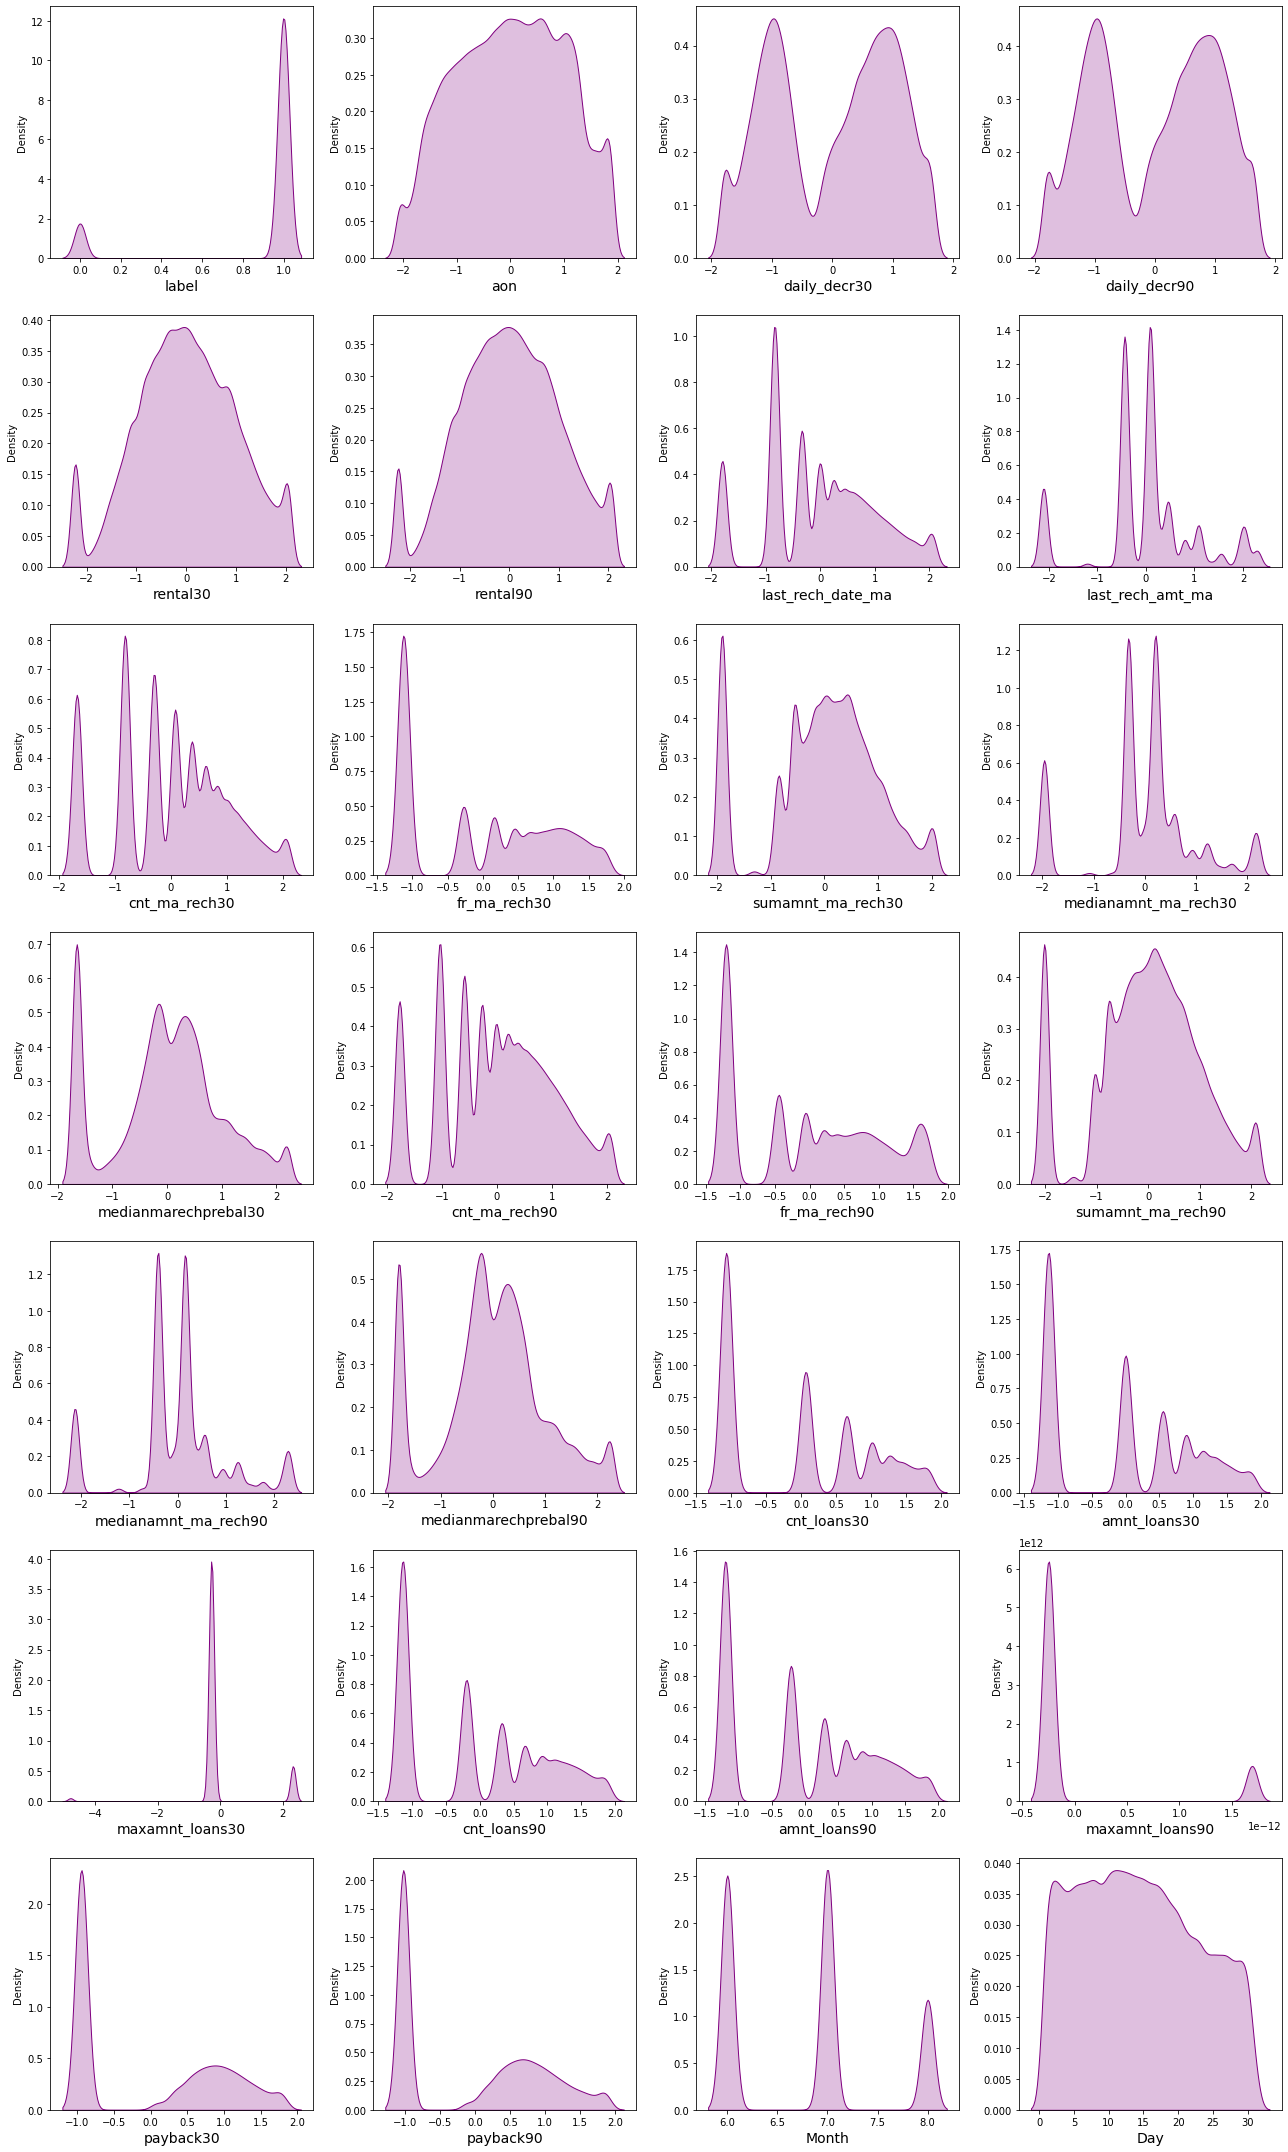

In [83]:
# Checking how the data has been distriubted in each column after removing skewness
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(df[column],color="purple",kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

From the above dist plots we can see that the data has been distributes normally in some of the columns and the skewness is also reduced compared to the previous data.

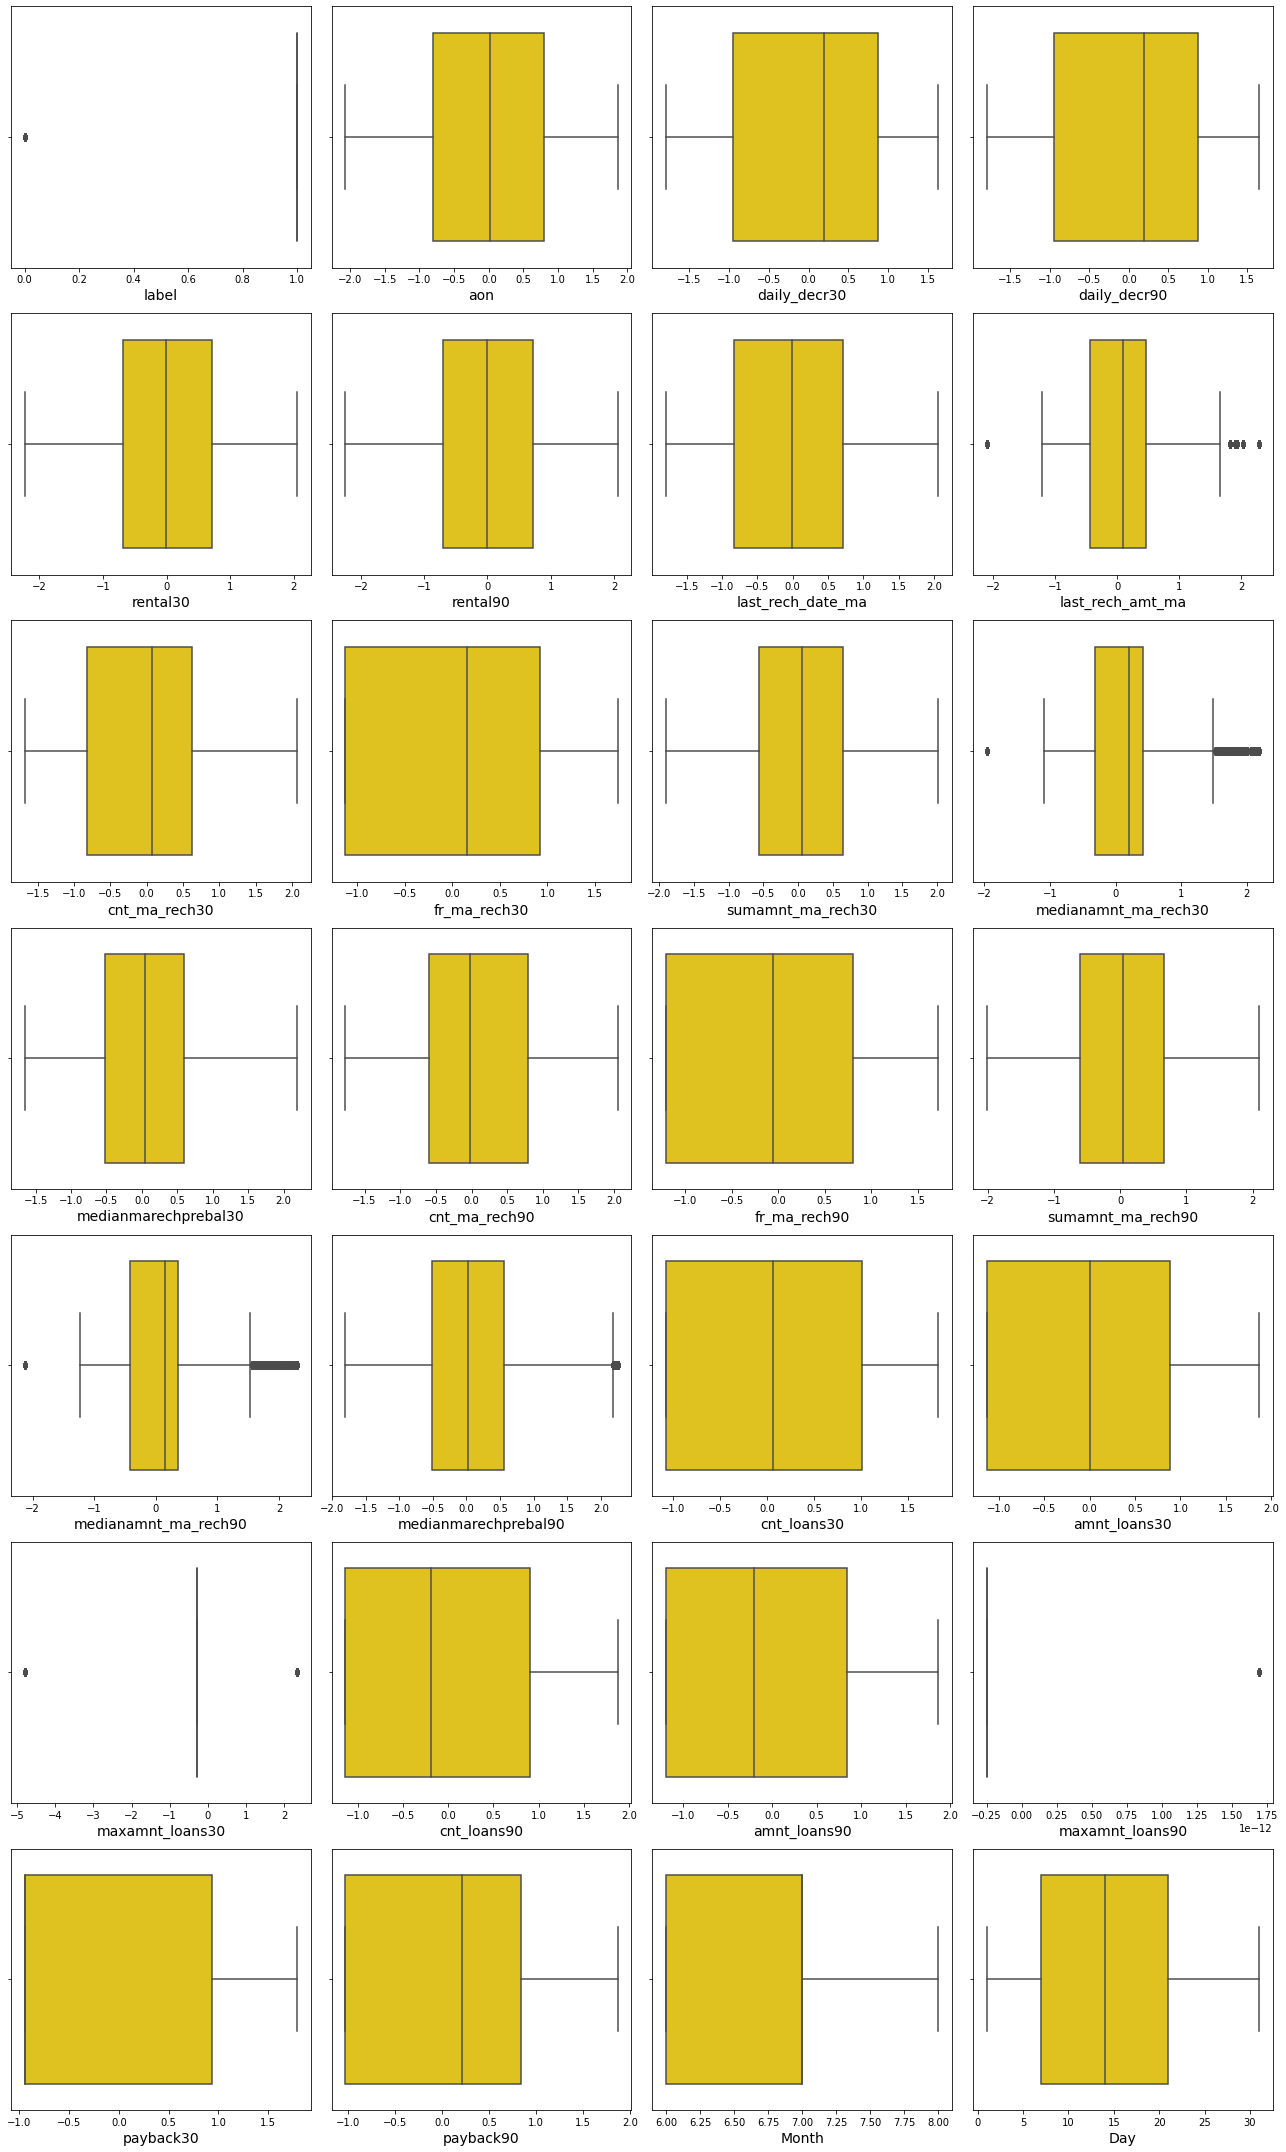

In [84]:
# Checking the outliers after using percentile method
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color="gold")
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

Its good to see that the outliers are almost removed in many columns after using percentile method and after removing skewness.

After cleaning the data we got only numerical data throughout the dataset. Since all the features in the dataset are numerical so no need to encode the data.

In [85]:
# Separating the feature and label into x and y
x = df.drop("label", axis=1)
y = df["label"]

In [86]:
# Dimension of x and y
x.shape,y.shape

((207550, 27), (207550,))

Since skewness present in one column and some of the columns have outliers and the data is not distributed normally in some of the columns, so let's use MinMaxScaler method to scale the data.

#  SCALING

In [87]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [88]:
#importing module-------scaling
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)
print(new_xtest)

[[0.5763921  0.28771649 0.28857396 ... 0.51285055 0.         0.56666667]
 [0.56252888 0.50296551 0.49937295 ... 0.         0.5        0.66666667]
 [0.28042557 0.33832555 0.33847051 ... 0.         0.         0.7       ]
 ...
 [0.19537869 0.82925502 0.81368381 ... 0.61975601 0.5        0.8       ]
 [0.33834804 0.16908682 0.26691043 ... 0.         0.5        0.7       ]
 [0.44508948 0.34193349 0.34201931 ... 0.         0.         0.76666667]]
[[0.53321084 0.81207771 0.79770795 ... 0.61975601 0.5        0.8       ]
 [1.         0.91187579 0.8937214  ... 0.46201044 0.5        0.8       ]
 [0.3610981  0.75436876 0.74251318 ... 0.71685134 0.5        0.6       ]
 ...
 [0.42211626 0.78653928 0.77231807 ... 0.66909828 0.5        0.36666667]
 [0.1101204  0.49030891 0.48715846 ... 0.         0.5        0.7       ]
 [0.14594951 0.46817765 0.46554344 ... 0.         0.5        0.        ]]


# Resampling Technique

## Oversampling

In [89]:
##The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)
###so we are balancing the classes with smote technique

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1)
x_train_res, y_train_res = sm.fit_resample(new_xtrain, y_train.ravel())
 
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 145165
Before OverSampling, counts of label '0': 20875 

After OverSampling, the shape of train_X: (290330, 27)
After OverSampling, the shape of train_y: (290330,) 

After OverSampling, counts of label '1': 145165
After OverSampling, counts of label '0': 145165


# MODEL PREDICTION

# LOGSITIC REGRESSION

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [91]:
lr=LogisticRegression()




In [92]:
for i in range(0,100):
   
    lr.fit(x_train_res, y_train_res.ravel())
    pred_train=lr.predict(x_train_res)
    pred_test=lr.predict(new_xtest)
    if round(accuracy_score(y_train_res.ravel(),pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_res.ravel(),pred_train)*100,1)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100,1)
        
        
        
   

### Cross Validation Score

In [93]:
from sklearn.model_selection import cross_val_score
acc_score=accuracy_score(y_test,pred_test)
for j in range(2,10):
    cross_V_score=cross_val_score(lr,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score*100)
    print("accuracy score is:",acc_score*100)
    print("\n")
        

At cv:- 2
cross validation score is: 75.83473861720067
accuracy score is: 75.83473861720067


At cv:- 3
cross validation score is: 75.83473861720067
accuracy score is: 75.83473861720067


At cv:- 4
cross validation score is: 75.83473861720067
accuracy score is: 75.83473861720067


At cv:- 5
cross validation score is: 75.83473861720067
accuracy score is: 75.83473861720067


At cv:- 6
cross validation score is: 75.83473861720067
accuracy score is: 75.83473861720067


At cv:- 7
cross validation score is: 75.83473861720067
accuracy score is: 75.83473861720067


At cv:- 8
cross validation score is: 75.83473861720067
accuracy score is: 75.83473861720067


At cv:- 9
cross validation score is: 75.83473861720067
accuracy score is: 75.83473861720067




# Hyper parameter Tuning

In [94]:
#performs GridsearchCV logistic regression
from sklearn.model_selection import GridSearchCV
parameters={'dual':[False,True],'fit_intercept':[True,False],'random_state':list(range(0,1)),'max_iter':[100,50], 'tol':[0.001,0.01]}
lr=LogisticRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_res,y_train_res)
print(clf.best_params_)


{'dual': False, 'fit_intercept': True, 'max_iter': 100, 'random_state': 0, 'tol': 0.001}


In [95]:
lr=LogisticRegression(fit_intercept= True, dual=False, max_iter= 100, random_state=0, tol= 0.001)
lr.fit(x_train_res,y_train_res.ravel())
pred_test_lr=lr.predict(new_xtest)
pred_train_lr=lr.predict(x_train_res)
lr_score = lr.score(x_train_res,y_train_res)
lr_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 75.83473861720067
score of model is: 76.98997692281198


In [96]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 88.00337268128162


In [97]:
print(classification_report(y_test, pred_test)) 

              precision    recall  f1-score   support

           0       0.32      0.78      0.45      5287
           1       0.96      0.76      0.85     36223

    accuracy                           0.76     41510
   macro avg       0.64      0.77      0.65     41510
weighted avg       0.88      0.76      0.79     41510



In [98]:
print(confusion_matrix(y_test,pred_test))

[[ 4099  1188]
 [ 8843 27380]]


In [99]:
print(accuracy_score(y_test,pred_test)*100)

75.83473861720067


AUc-ROC Curve

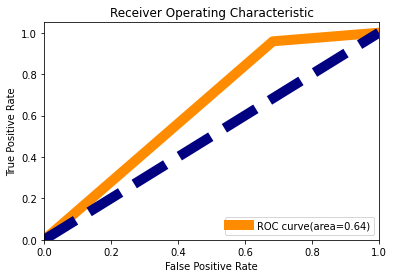

In [100]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 64%

# RANDOM FOREST CLASSIFIER

In [101]:
# importing modules

from sklearn.ensemble import RandomForestClassifier

#creating RandomForestClassifier constructor
rf = RandomForestClassifier(random_state=5)
# fit data
rf.fit(x_train_res,y_train_res.ravel())
# predicting score
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_res)
#calculates score of the model using score method
rf_score = rf.score(new_xtest,y_test)
print('score of model is : ',rf_score*100)

score of model is :  91.47675258973742


In [102]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_rf)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_rf)*100)

        

Accuracy Score of Training Data is: 99.99724451486239
Accuracy Score of Testing Data is: 91.47675258973742


In [103]:
#choosing best Random state
for i in range(0,4):
    rf.fit(x_train_res, y_train_res.ravel())
    pred_train_rf=rf.predict(x_train_res)
    pred_test_rf=rf.predict(new_xtest)
    if round(accuracy_score(y_train_res.ravel(),pred_train_rf)*100,1)== round(accuracy_score(y_test,pred_test_rf)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_res.ravel(),pred_train_rf)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test_rf)*100)
        

In [104]:
print("accuracy score is:",accuracy_score(y_test,pred_test_rf)*100)

accuracy score is: 91.47675258973742


In [105]:
#cross validation 
from sklearn.model_selection import cross_val_score
acc_score_rf=accuracy_score(y_test,pred_test_rf)
for j in range(2,5):
    cross_V_score=cross_val_score(rf,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score_rf*100)
    print("accuracy score is:",acc_score_rf*100)
    print("\n")
        

At cv:- 2
cross validation score is: 91.47675258973742
accuracy score is: 91.47675258973742


At cv:- 3
cross validation score is: 91.47675258973742
accuracy score is: 91.47675258973742


At cv:- 4
cross validation score is: 91.47675258973742
accuracy score is: 91.47675258973742




## parameter tuning

In [107]:
#performs GridSearchCV on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'n_jobs':[1,-1],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2],'bootstrap':[True,False]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'bootstrap': False, 'criterion': 'entropy', 'min_weight_fraction_leaf': 0.1, 'n_jobs': 1, 'random_state': 0}


In [121]:
rf=RandomForestClassifier(criterion="entropy",random_state=0,bootstrap="False",min_weight_fraction_leaf= 0.1,n_jobs= 1)
rf.fit(x_train_res,y_train_res.ravel())
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_res)
rf_score = rf.score(x_train_res,y_train_res)
rf_acc_score=accuracy_score(y_test,pred_test)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 75.83473861720067
score of model is: 76.68101815175834


In [122]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 87.39484461575525


In [123]:
print(confusion_matrix(y_test,pred_test_rf))

[[ 3962  1325]
 [ 8581 27642]]


In [124]:
print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.32      0.75      0.44      5287
           1       0.95      0.76      0.85     36223

    accuracy                           0.76     41510
   macro avg       0.64      0.76      0.65     41510
weighted avg       0.87      0.76      0.80     41510



AUC-ROC CURVE:

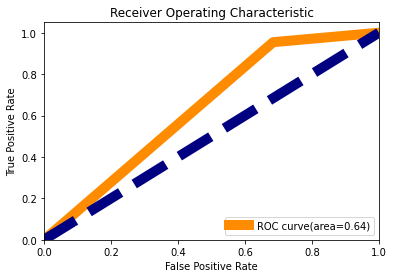

In [125]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_rf,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 64%

DECISION TREE CLASSIFIER

In [113]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train_res, y_train_res.ravel())
pred_test_dtc = dtc.predict(new_xtest)
pred_train_dtc = dtc.predict(x_train_res)
dtc_score = dtc.score(new_xtest,y_test)
print('score of model is : ',dtc_score*100)



score of model is :  87.35003613587088


In [114]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)


Accuracy Score of Training Data is: 99.99862225743121
Accuracy Score of Testing Data is: 87.35003613587088


parameter tuning

In [115]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto', 'sqrt'],'random_state':list(range(0,1)),'max_depth':[11],'min_samples_split': [2,3],'min_samples_leaf':[1,2] }
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}


In [126]:
dt=DecisionTreeClassifier(criterion='gini',max_features= 'auto',max_depth= 11 , random_state= 0, splitter= 'best',min_samples_leaf= 1,min_samples_split= 2)
dt.fit(x_train_res,y_train_res.ravel())
pred_test_dt=dt.predict(new_xtest)
pred_train_dt=dt.predict(x_train_res)
dt_score = dt.score(x_train_res,y_train_res.ravel())
dt_acc_score=accuracy_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 81.62611418935197
score of model is: 85.23301071194848


In [127]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 90.80655263791859


In [128]:
print(confusion_matrix(y_test,pred_test_dtc))

[[ 3080  2207]
 [ 3044 33179]]


In [129]:
print(classification_report(y_test,pred_test_dtc))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54      5287
           1       0.94      0.92      0.93     36223

    accuracy                           0.87     41510
   macro avg       0.72      0.75      0.73     41510
weighted avg       0.88      0.87      0.88     41510



AUC-ROC CURVE:

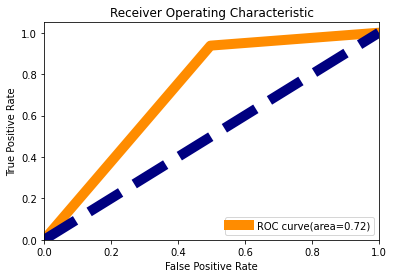

In [130]:
# ROC_AUC CURVE
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_dtc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 72%

GAUSSIANNB

In [131]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train_res, y_train_res.ravel())
pred_test_gnb = gnb.predict(new_xtest)
pred_train_gnb = gnb.predict(x_train_res)
gnb_score = gnb.score(new_xtest,y_test)
print('score of model is : ',gnb_score*100)

score of model is :  74.09539869910866


In [132]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_gnb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gnb)*100)


Accuracy Score of Training Data is: 75.18857851410465
Accuracy Score of Testing Data is: 74.09539869910866


parameter tuning

In [133]:
#perform gridsearchcv and cross val score on GaussianNB
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb=GaussianNB() 
clf = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.0533669923120631}


In [134]:
gnb=GaussianNB(var_smoothing=0.15199110829529336)
gnb.fit(x_train_res,y_train_res.ravel())
pred_test_gnb=gnb.predict(new_xtest)
pred_train_gnb=gnb.predict(x_train_res)
gnb_score = gnb.score(x_train_res,y_train_res.ravel())
gnb_acc_score=accuracy_score(y_test,pred_test_gnb)
print("Accuracy score is:",gnb_acc_score*100)
print("score of model is:",gnb_score*100)

Accuracy score is: 73.78463020958806
score of model is: 75.13209106878381


In [135]:
cv_score_gnb=cross_val_score(gnb,x,y,cv=5)
cv_mean_gnb=cv_score_gnb.mean()
print("cv_mean is:",cv_mean_gnb*100)




cv_mean is: 88.30643218501567


In [136]:
print(confusion_matrix(y_test,pred_test_gnb))

[[ 4034  1253]
 [ 9629 26594]]


In [137]:
print(classification_report(y_test,pred_test_gnb))

              precision    recall  f1-score   support

           0       0.30      0.76      0.43      5287
           1       0.96      0.73      0.83     36223

    accuracy                           0.74     41510
   macro avg       0.63      0.75      0.63     41510
weighted avg       0.87      0.74      0.78     41510



AUC-ROC CURVE:

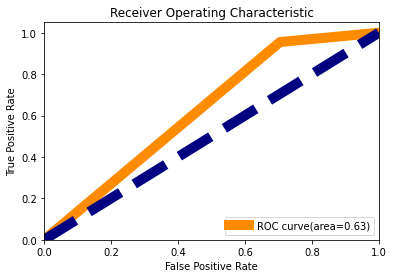

In [138]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gnb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 63%

GRADIENT BOOSTING CLASSIFIER

In [163]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(x_train_res, y_train_res)
pred_test_gb = gb.predict(new_xtest)
pred_train_gb = gb.predict(x_train_res)
gb_score = gb.score(new_xtest,y_test)
print('score of model is : ',gb_score*100)




score of model is :  87.02481329800048


In [164]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_gb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gb)*100)

Accuracy Score of Training Data is: 89.95625667344058
Accuracy Score of Testing Data is: 87.02481329800048


In [172]:
print(confusion_matrix(y_test,pred_test_gb))

[[ 3987  1300]
 [ 4086 32137]]


In [173]:
print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.49      0.75      0.60      5287
           1       0.96      0.89      0.92     36223

    accuracy                           0.87     41510
   macro avg       0.73      0.82      0.76     41510
weighted avg       0.90      0.87      0.88     41510



AUC-ROC CURVE:

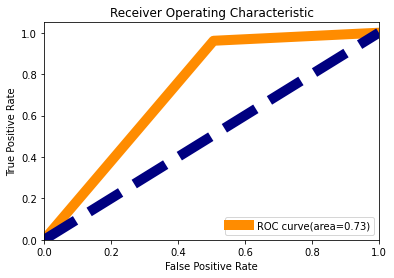

In [174]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 73%

LIGHT GRADIENT BOOSTING CLASSIFIER

In [140]:
!pip install lightgbm

In [141]:
#Light Gradient Boosting Classifier

In [142]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train_res, y_train_res.ravel())
pred_test_lgbm = lgbm.predict(new_xtest)
pred_train_lgbm = lgbm.predict(x_train_res)
lgbm_score = lgbm.score(new_xtest,y_test)
print('score of model is : ',lgbm_score*100)



score of model is :  91.00216815225247


In [143]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_lgbm)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_lgbm)*100)


Accuracy Score of Training Data is: 94.61474873419901
Accuracy Score of Testing Data is: 91.00216815225247


In [144]:
print(confusion_matrix(y_test,pred_test_lgbm))

[[ 3398  1889]
 [ 1846 34377]]


In [145]:
print(classification_report(y_test,pred_test_lgbm))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65      5287
           1       0.95      0.95      0.95     36223

    accuracy                           0.91     41510
   macro avg       0.80      0.80      0.80     41510
weighted avg       0.91      0.91      0.91     41510



AUC-ROC CURVE:

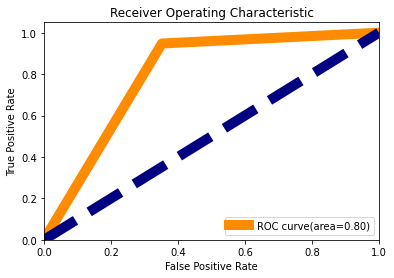

In [146]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_lgbm,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 80%

CAT BOOST CLASSIFIER

In [147]:
!pip install catboost

In [148]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train_res, y_train_res.ravel())
pred_test_cat = cat.predict(new_xtest)
pred_train_cat = cat.predict(x_train_res)
cat_score = cat.score(new_xtest,y_test)
print('score of model is : ',cat_score*100)



Learning rate set to 0.116035
0:	learn: 0.5829817	total: 216ms	remaining: 3m 35s
1:	learn: 0.5269479	total: 274ms	remaining: 2m 16s
2:	learn: 0.4913842	total: 321ms	remaining: 1m 46s
3:	learn: 0.4653059	total: 361ms	remaining: 1m 29s
4:	learn: 0.4371351	total: 397ms	remaining: 1m 19s
5:	learn: 0.4215135	total: 434ms	remaining: 1m 11s
6:	learn: 0.4070544	total: 472ms	remaining: 1m 6s
7:	learn: 0.3897583	total: 508ms	remaining: 1m 2s
8:	learn: 0.3768554	total: 544ms	remaining: 59.9s
9:	learn: 0.3652616	total: 582ms	remaining: 57.6s
10:	learn: 0.3569460	total: 618ms	remaining: 55.5s
11:	learn: 0.3497498	total: 657ms	remaining: 54.1s
12:	learn: 0.3431596	total: 692ms	remaining: 52.5s
13:	learn: 0.3377325	total: 727ms	remaining: 51.2s
14:	learn: 0.3277177	total: 762ms	remaining: 50s
15:	learn: 0.3202762	total: 796ms	remaining: 48.9s
16:	learn: 0.3141886	total: 829ms	remaining: 48s
17:	learn: 0.3081185	total: 866ms	remaining: 47.2s
18:	learn: 0.3033680	total: 903ms	remaining: 46.6s
19:	learn

In [149]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_cat)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_cat)*100)


Accuracy Score of Training Data is: 96.04484552061447
Accuracy Score of Testing Data is: 91.97060949168875


In [150]:
print(confusion_matrix(y_test,pred_test_cat))

[[ 3143  2144]
 [ 1189 35034]]


In [151]:
print(classification_report(y_test,pred_test_cat))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65      5287
           1       0.94      0.97      0.95     36223

    accuracy                           0.92     41510
   macro avg       0.83      0.78      0.80     41510
weighted avg       0.91      0.92      0.92     41510



AUC-ROC CURVE:

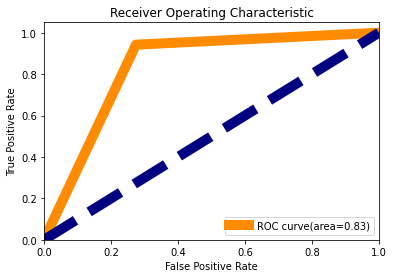

In [152]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_cat,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 83%

XGBOOST

In [156]:
!pip install xgboost

In [157]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train_res, y_train_res.ravel())
pred_test_xgb = xgb.predict(new_xtest)
pred_train_xgb = xgb.predict(x_train_res)
xgb_score = xgb.score(new_xtest,y_test)
print('score of model is : ',xgb_score*100)




[05:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of model is :  91.63815947964345


In [158]:
print(confusion_matrix(y_test,pred_test_xgb))

[[ 3241  2046]
 [ 1425 34798]]


In [159]:
print(classification_report(y_test,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.69      0.61      0.65      5287
           1       0.94      0.96      0.95     36223

    accuracy                           0.92     41510
   macro avg       0.82      0.79      0.80     41510
weighted avg       0.91      0.92      0.91     41510



AUC-ROC CURVE:

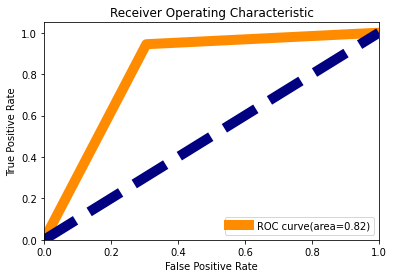

In [160]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_xgb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 82%


CONCLUSION


OUTPUT

In [180]:
import numpy as np
a=np.array(y_test)
predicted=np.array(cat.predict(new_xtest))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
41505,1,1
41506,1,1
41507,0,1
41508,0,0


Text(0.5, 1.0, 'Predicted')

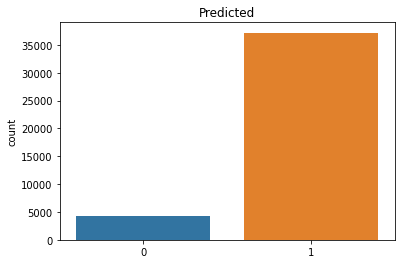

In [181]:
sns.countplot(x=predicted, data=df_con)
plt.title("Predicted")

Text(0.5, 1.0, 'Original')

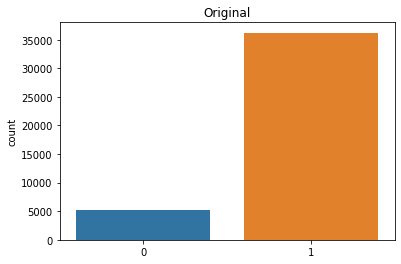

In [182]:
ax = sns.countplot(x=a, data=df)
plt.title("Original")

SAVE MODEL

In [184]:
import pickle
filename='Micro-Credit Defaulter_Prediction _cat.pkl'
pickle.dump(cat,open(filename,'wb'))


In [175]:
models=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','Gradient Boosting Classifier','Light Gradient Boosting Classifier','CatBoostClassifier',
'XGBoost']
        

In [177]:
scores=[(accuracy_score(y_test,pred_test)*100),accuracy_score(y_test,pred_test_rf)*100,accuracy_score(y_test,pred_test_dtc)*100,
       accuracy_score(y_test,pred_test_gnb)*100,accuracy_score(y_test,pred_test_gb)*100,accuracy_score(y_test,pred_test_lgbm)*100,accuracy_score(y_test,pred_test_cat)*100,
       accuracy_score(y_test,pred_test_xgb)*100,]
scores

[75.83473861720067,
 76.13587087448808,
 87.35003613587088,
 73.78463020958806,
 87.02481329800048,
 91.00216815225247,
 91.97060949168875,
 91.63815947964345]

In [178]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8]

In [179]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.sort_values(by='Scores', ascending=False).style.hide_index()

Nos,Model Names,Scores
7,CatBoostClassifier,91.970609
8,XGBoost,91.638159
6,Light Gradient Boosting Classifier,91.002168
3,DecisionTreeClassifier,87.350036
5,Gradient Boosting Classifier,87.024813
2,RandomForestClassifier,76.135871
1,LogisticRegression,75.834739
4,GaussianNB,73.784630


From the above models CatBoostClassifier performs well.
Because,CatBoost is the only boosting algorithm with very less prediction time. It is comparatively 8x faster than XGBoost while predicting.It uses symmetric trees, that makes it to have a fast inference.
Its boosting schemes helps to reduce over fitting and improves quality of the model.
It supports sophisticated categorical features.
So we save this model for prediction

## Key Insights

The Defaulter cases of Micro card credit company can be monitored and can improve them as Non Defaulters status by concentrating and changing the following factors mainly,

cnt_ma_rech30   ----Number of times main account got recharged in last 30 days
cnt_ma_rech90   ----Number of times main account got recharged in last 90 days
sumamnt_ma_rech90  ----Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
sumamnt_ma_rech30  ---Total amount of recharge in main account over last 30 days (in Indonasian Rupiah)
amnt_loans90 ----Total amount of loans taken by user in last 90 days
amnt_loans30 ----Total amount of loans taken by user in last 30 days
cnt_loans30  ----Number of loans taken by user in last 30 days
etc.,


The companies customer retention and growth can also be improved by condisedring the factor daily_decr90

In [185]:
df_con.to_csv("Micro-Credit Defaulter_Prediction _cat.csv",sep='\t')